# CLASE 4.3: OPTIMIZACIÓN
---
## Introducción.
Cuando colgamos una foto en la pared, a veces es difícil dejarla bien derecha. En general, queremos hacer un determinado ajuste, detenernos, evaluar la horizontalidad de la foto, y volver a repetir el proceso. Dicha secuencia de acciones es un ejemplo (trivial, si nos permitimos la licencia de decirlo así...) de resolución de un problema de optimización. Estamos cambiando la orientación de nuestra foto hasta que satisfaga nuestro requerimiento. Esto es, que su ángulo respecto de la horizontal sea igual a cero.

Un **problema de optimización** puede definirse *a groso modo* como uno que posee *infinitas* soluciones, pero sólo una que podemos denominar, bajo determinados criterios, como la *mejor* solución de todas ellas. El conjunto de infinitas soluciones que podemos asumir, en primera instancia, como *candidatas* para resolver nuestro problema suele denominarse como **espacio de soluciones factibles** del mismo, mientras que la *mejor* solución de dicho espacio, que puede ser estimada por una generosa variedad de métodos tanto algebraicos como numéricos, suele denominarse como **solución óptima** del problema. El *criterio* que permite establecer cúal es la mejor solución en un problema de este tipo guarda relación con los valores que toma una función, denominada como **función objetivo**, sobre el conjunto de soluciones factibles. Normalmente, estamos interesados en el o los valores máximos y mínimos que toma dicha función.

Consideremos, por ejemplo, la función cuadrática $f(x)=(x-3)^{2}$. Queremos encontrar el valor de $x$ tal que $f$ alcanza su valor mínimo. En términos gráficos, al ser $f$ una función cuadrática, sabemos que ésta describe una parábola en $\mathbb{R}^{2}$ con concavidad positiva (apuntando *hacia arriba*). Por lo tanto, es evidente que $f$ tiene un valor mínimo justo en el vértice de dicha parábola, cuando $x=3$.

En general, del curso de cálculo diferencial, sabemos que toda función $f$ que satisfaga el [teorema de Rolle](https://en.wikipedia.org/wiki/Rolle%27s_theorem) será tal que, para todo intervalo abierto $(a, b)$ donde $f$ es diferenciable y $f(a)=f(b)$, siempre existirá un punto interior $c$, tal que $a<c<b$, donde $f'(c)=0$. El punto $x=c$ es llamado **punto crítico** de $f$, y dará lugar a un valor máximo o mínimo de $f$ dependiendo del signo de la derivada $f'(x)$ para puntos a ambos lados de $c$ (criterio de la primera derivada). Si nos referimos a la función cuadrática $f(x)=(x-3)^{2}$, es fácil determinar que $f'(x)=2(x-3)$, de donde sabemos que el único punto crítico de $f$ es $x_{0}=3$. Debido a que la derivada de $f$ es negativa a la izquierda de $x_{0}$ y positiva a la derecha de $x_{0}$, se tendrá que $x_{0}=3$ es un mínimo de $f$.

El ejemplo anterior pone de manifiesto un problema sencillo de optimización univariable que es resoluble de forma analítica, ya que conocemos la función objetivo y no existen restricciones que limiten el espacio de soluciones factibles del problema. Sin embargo, si esta función fuese matemáticamente de mayor complejidad (por ejemplo, si la correspondiente expresión tuviera múltiples términos, varios puntos con derivada nula –máximos y/o mínimos locales, o puntos de ensilladura, que son puntos donde la derivada es nula, pero que no resultan en valores máximos y/o mínimos–, relaciones no lineales, o fuera dependiente de más de una variable), su optimización por métodos manuales sería, como mínimo, una misión extremadamente ardua y muchas veces imposible de resolver en términos algebraicos.

Podemos imaginar a la función objetivo en un problema de optimización como la representación de un paisaje, digamos de un valle, para el cual deseamos encontrar el punto con la mínima elevación posible. Tal analogía pone de manifiesto unq de las principales dificultades al enfrentarnos a un problema de este tipo: Si estuviéramos parados en cualquier valle, con montañas a nuestro alrededor ¿Cómo sabemos si aquel valle es el punto más bajo en toda la extensión de interés? O bien ¿Este valle es el más bajo, siendo que hay otros valles más allá de dichas montañas? En una jerga más formal ¿Cómo sabemos si no nos encontramos en un mínimo local, que corresponde a un valor mínimo de la función objetivo, pero sólo en un entorno local?

## Conceptos preliminares.
La situación presentada previamente pone de manifiesto que un problema de optimización corresponde a un desafío que puede resultar significativamente difícil bajo determinadas condiciones. Para poder entender dicha dificultad, será bueno refrescar algunos conocimientos que, en general, son repasados en detalle en los cursos de cálculo diferencial. No nos extenderemos demasiado aquí en ellos, pero sí será útil tenerlos en consideración. Ante todo, intentaremos dar ejemplos gráficos de lo que estamos hablando, para lo cual haremos un uso intensivo de la librería **Matplotlib**, a fin de graficar algunos resultados. Por supuesto, nos apoyaremos igualmente con **Numpy**, a fin de construir algunos arreglos de datos que nos permitirán describir ciertas funciones de interés:

In [1]:
# Importación de librerías.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sympy as sp

In [2]:
from IPython.core.display import HTML
from mpl_toolkits import mplot3d

In [3]:
# Setting de parámetros de graficación.
sns.set()
plt.rcParams["figure.dpi"] = 100 # Resolución de nuestras figuras.
plt.style.use("seaborn-v0_8-white") # Template de estilo.

In [4]:
# Centramos el output de los gráficos en este notebook.
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:
# Inicializamos el sistema de impresión de resultados simbólicos de Sympy.
sp.init_printing()

In [6]:
%matplotlib notebook

En lo que resta de esta subsección, trabajaremos con campos escalares. Esto es, funciones reales o escalares de variable vectorial, del tipo $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$, para $n\geq 2$, donde $U$ es un conjunto abierto de $\mathbb{R}^{n}$. Estamos interesados en resolver, mediante herramientas computacionales, problemas del tipo:

$$\begin{array}{ll}\min_{\mathbf{x} } &f\left( \mathbf{x} \right)  \\ \mathrm{s} .\mathrm{a} .:&g_{i}\left( \mathbf{x} \right)  \leq 0\\ &h_{j}\left( \mathbf{x} \right)  =0\end{array}$$
</p> <p style="text-align: right;">$(3.1)$</p>

Donde $1\leq i\leq m$ y $1\leq j\leq p$, donde:
- $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ es una **función objetivo** que deseamos minimizar sobre el vector $\mathbf{x}$ de $n$ variables.
- El conjunto $g_{i}(\mathbf{x})=0$ es denominado **restricciones de desigualdad**.
- El conjunto $h_{j}(\mathbf{x})=0$ es denominado **restricciones de igualdad**.
- Y por supuesto, $m,p\geq 0$.

Si $m=p=0$, el problema (3.1), llamado **problema de optimización restringida**, se reduce a uno del tipo **no restringido**. Por convención, la forma estándar anterior define un problema de minimización. Un problema de maximización puede tratarse negando la función objetivo; es decir, escribiendo $\max(f(\mathbf{x}))=-\min(f(\mathbf{x}))$.

Sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en el conjunto abierto $U$ de $\mathbb{R}^{n}$. Diremos que $f$ tiene un **mínimo (o un máximo) local o relativo** en el punto $x_{0}\in U$, si $f\left( \mathbf{x}_{0} \right)  \leq f\left( \mathbf{x} \right)$ ($f\left( \mathbf{x}_{0} \right)  \geq f\left( \mathbf{x} \right)$, respectivamente) para todo $\mathbf{x}$ en una bola $B$ de centro en $\mathbf{x}_{0}$. Es decir, al igual que en el caso de las funciones de una variable, la función $f$ tendrá un mínimo local en $\mathbf{x}_{0}\in U$ si $f(\mathbf{x}_{0})$ es el valor más pequeño de todos los valores de $f(\mathbf{x})$ para $\mathbf{x}$ en una bola $B$ de centro en $\mathbf{x}_{0}$.

Podemos observar un ejemplo sencillo del concepto anterior considerando la función $f(x,y)=x^{2}+y^{2}$, cuyo gráfico describe una superficie conocida como paraboloide circular. Dicha función tiene un mínimo global (absoluto, que es el valor mínimo de la función en todo su dominio) en el origen. Para comprobarlo, haremos uso las librerías que ya conocemos para graficar esta superficie en el entorno de dicho mínimo global:

In [7]:
# Definimos la función correspondiente.
def f(x, y):
    return x**2 + y**2

In [8]:
# Creamos un par de arreglos que limitarán la grilla completa de valores donde graficaremos f.
x = np.linspace(start=-5, stop=5, num=100)
y = np.linspace(start=-5, stop=5, num=100)

X, Y = np.meshgrid(x, y)

In [9]:
# Evaluamos f en esta grilla.
Z = f(X, Y)

<IPython.core.display.Javascript object>


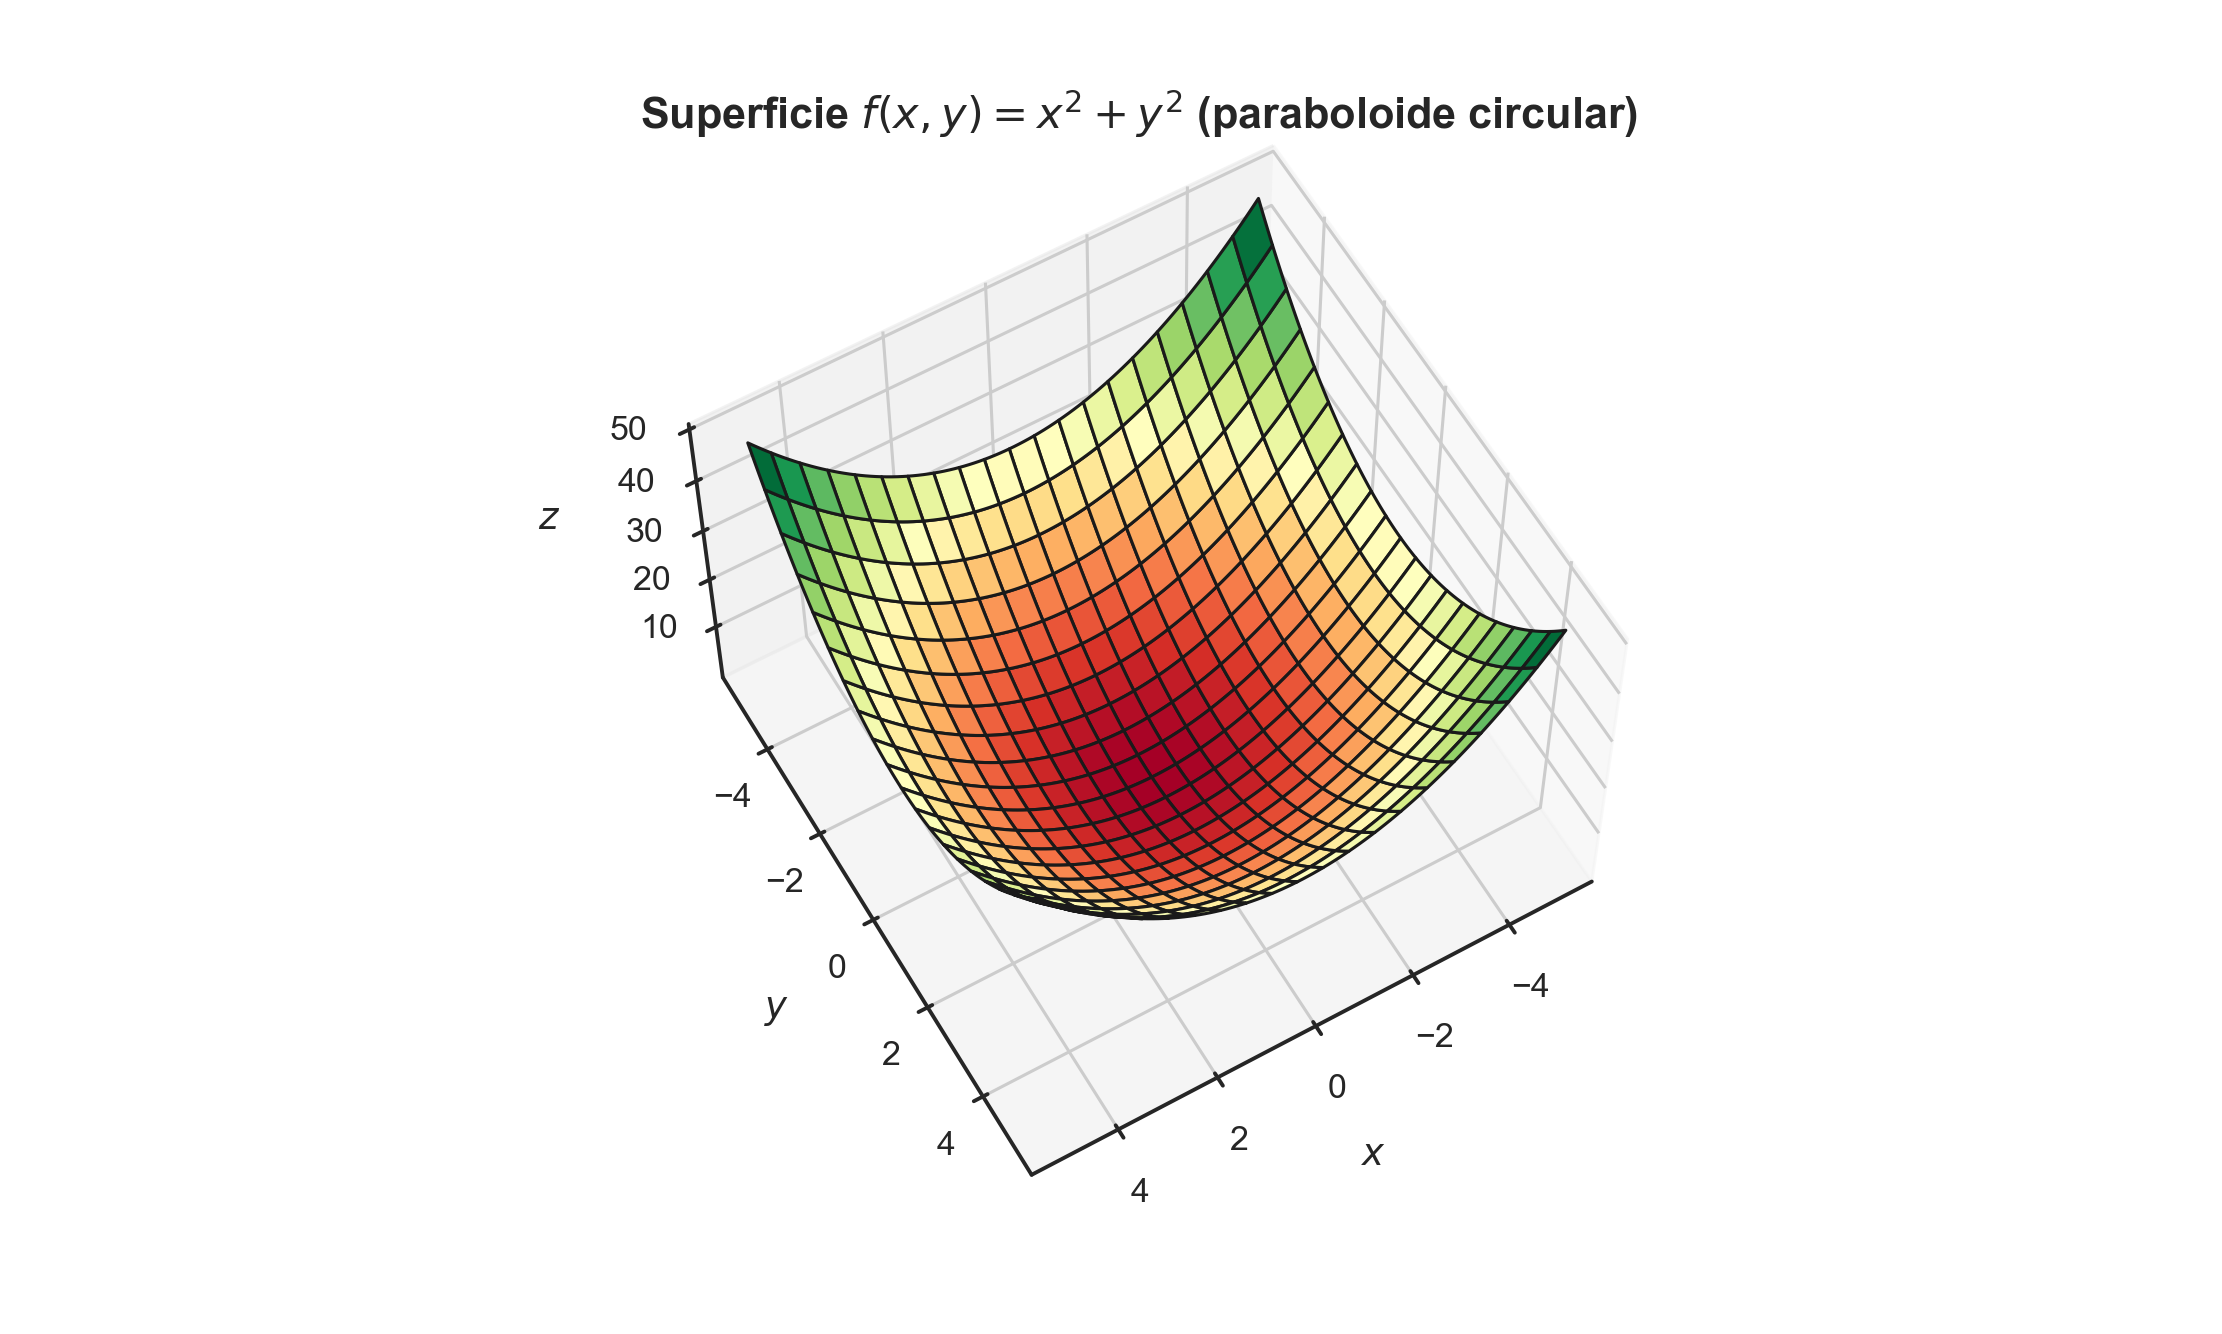

In [10]:
# Y construimos el gráfico de la superficie.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap='RdYlGn', edgecolor='k')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title(r'Superficie $f(x,y)=x^{2}+y^{2}$ (paraboloide circular)', fontsize=14, fontweight="bold", pad=10)
ax.view_init(60, 60);

<IPython.core.display.Javascript object>


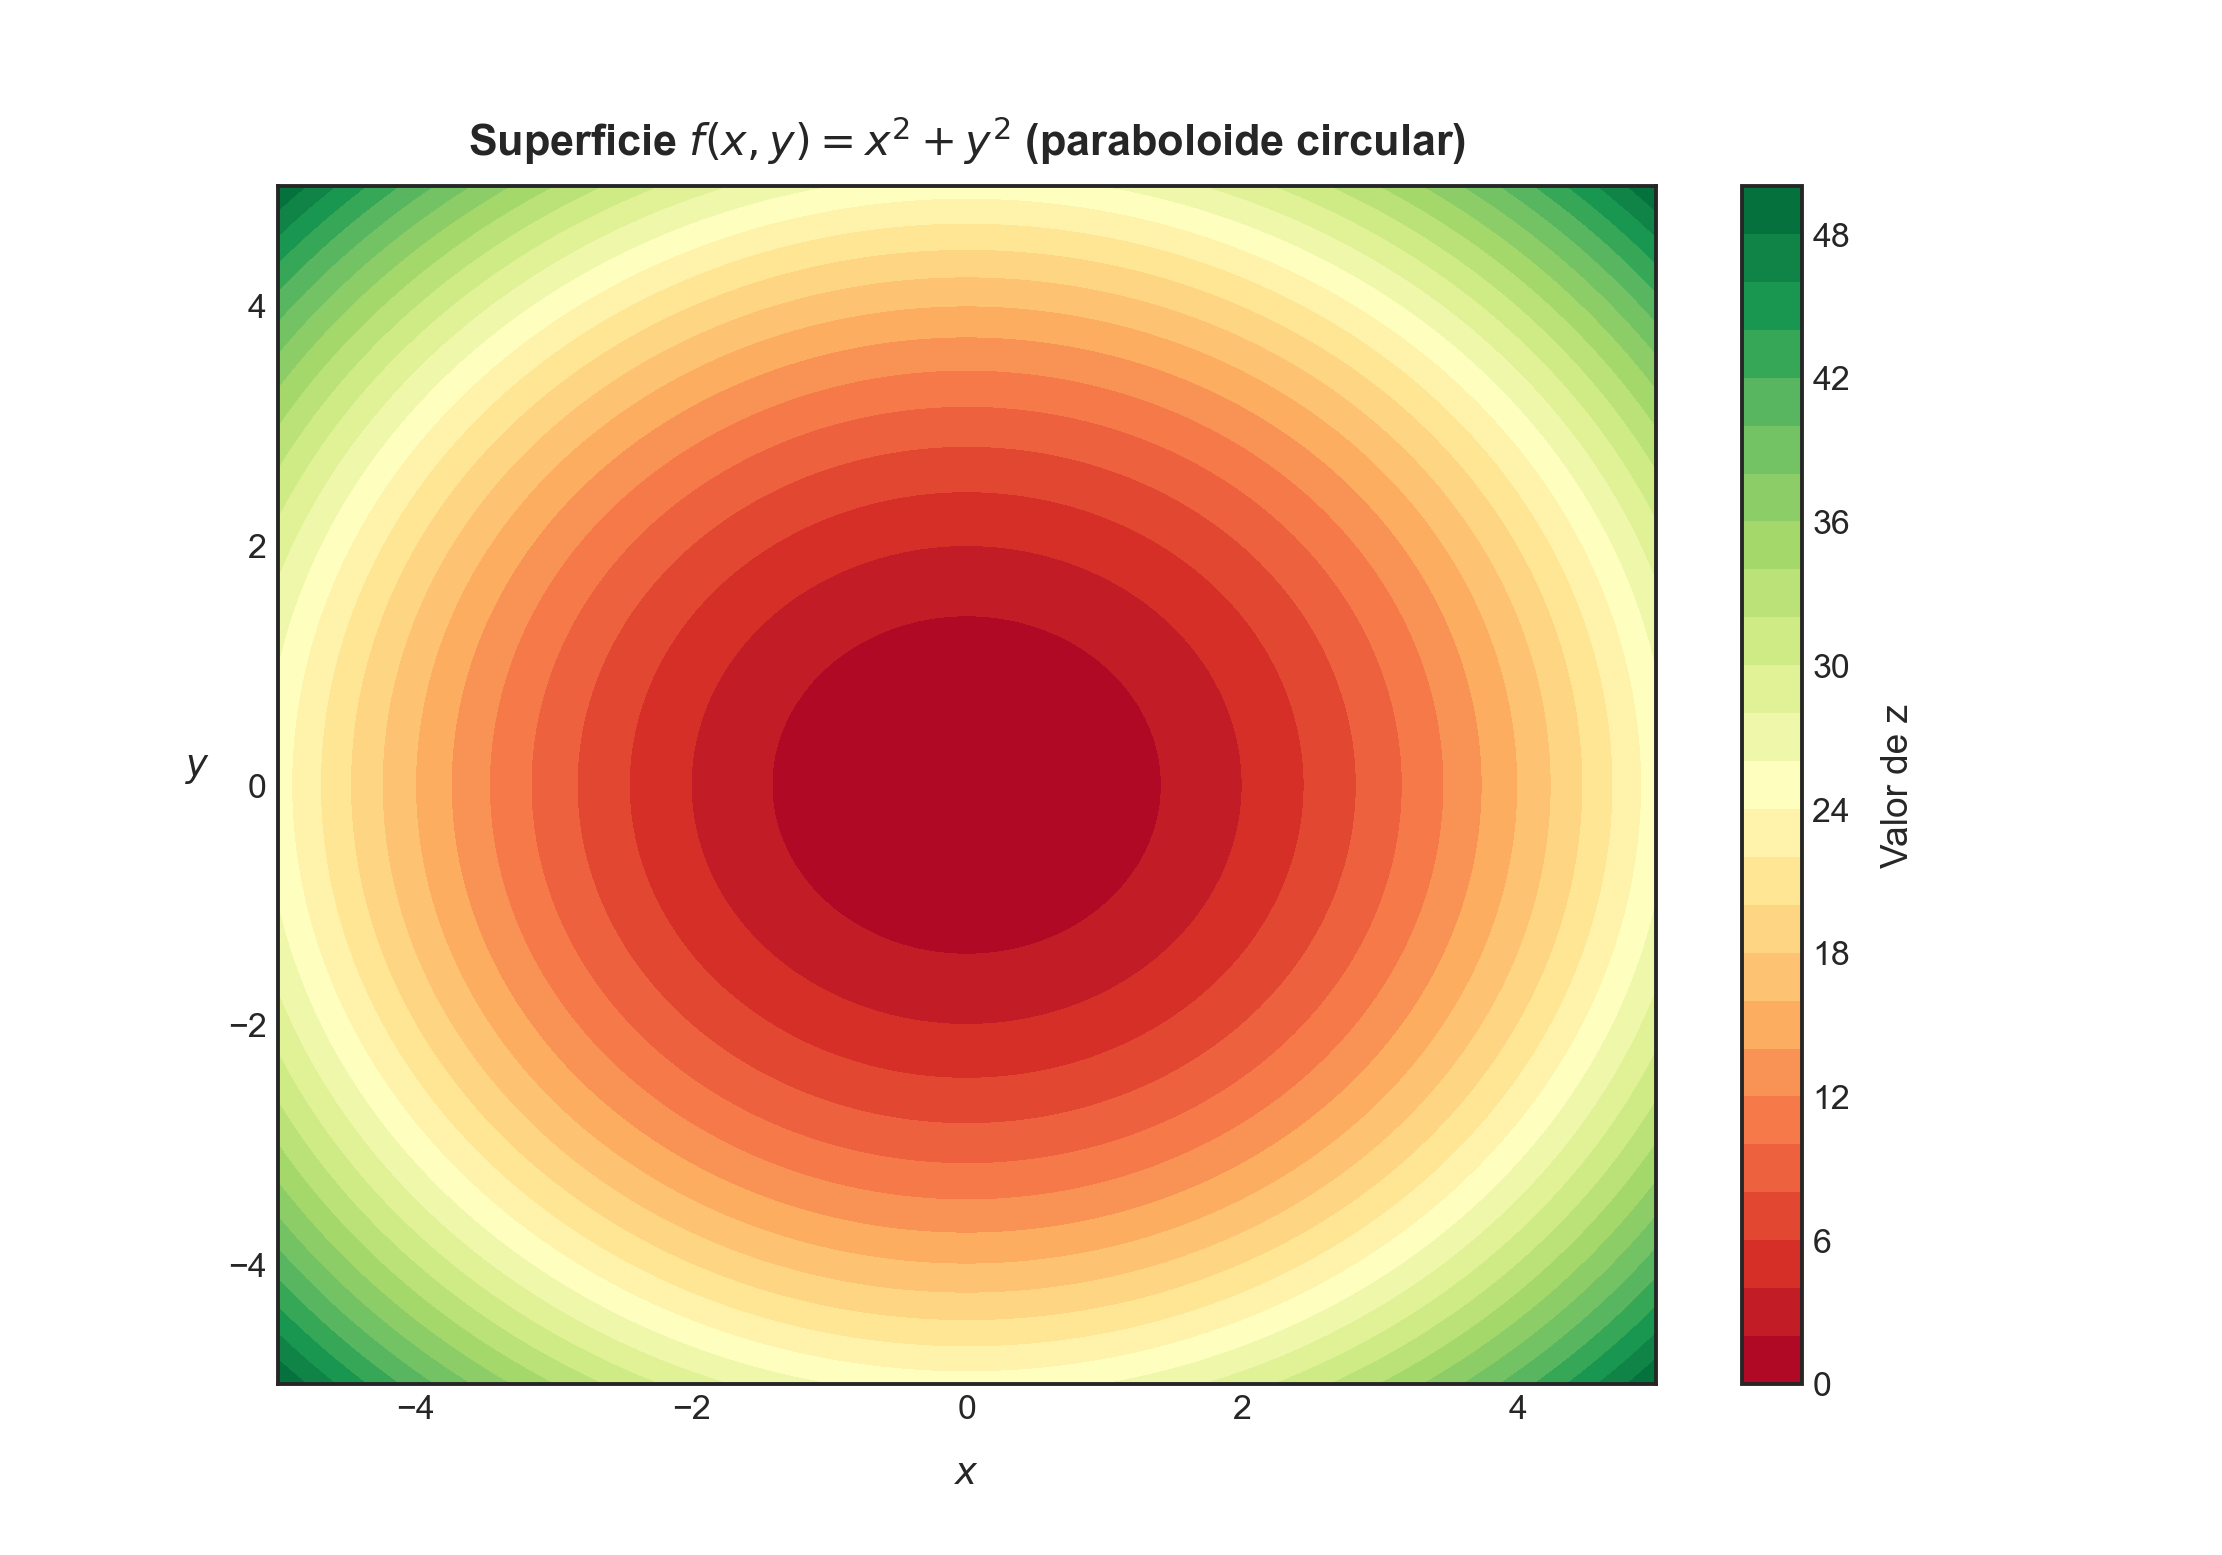

In [11]:
# Y creamos un gráfico de contorno completo para visualizar este mínimo global en 2D.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X, Y, Z, levels=30, cmap='RdYlGn')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10, rotation=0)
ax.set_title(r'Superficie $f(x,y)=x^{2}+y^{2}$ (paraboloide circular)', fontsize=14, fontweight="bold", pad=10)
cb = plt.colorbar(p)
cb.set_label("Valor de z", fontsize=12, labelpad=10);

Consideremos la función $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ definida en el conjunto abierto $U$ de $\mathbb{R}^{n}$. Sea $\bar{\mathbf{x}}\in U$. Si cualquier bola (de $\mathbb{R}^{n}$) con centro en $\bar{\mathbf{x}}$ contiene puntos $\mathbf{x}\in B$ tales que $f(\mathbf{x})-f(\bar{\mathbf{x}})>0$ y puntos $\mathbf{y}\in B$ tales que $f(\mathbf{y})-f(\bar{\mathbf{x}})>0$, entonces decimos que $\mathbf{x}$ es un **punto de ensilladura** (o punto silla) de la función $f$.

El aspecto de la gráfica de una función $f:U\subseteq \mathbb{R}^{2} \rightarrow \mathbb{R}$ en el entorno de un punto de ensilladura es, en efecto, en de una silla de montar. Un ejemplo clásico de un punto con estas características se puede observar en una superficie denominada paraboloide hiperbólico. Dicha superficie corresponde a la gráfica de la función $f\left( x,y\right)  =\frac{x^{2}}{a^{2}} -\frac{y^{2}}{b^{2}}$, con $a, b>0$. Podemos graficar dicha función para tener una visualización completa del correspondiente punto de ensilladura:

In [12]:
# Definimos la función correspondiente.
def f(x, y, a, b):
    return x**2/a**2 - y**2/b**2

In [13]:
# Evaluamos f en la grilla anterior.
Z = f(X, Y, a=3, b=2)

<IPython.core.display.Javascript object>


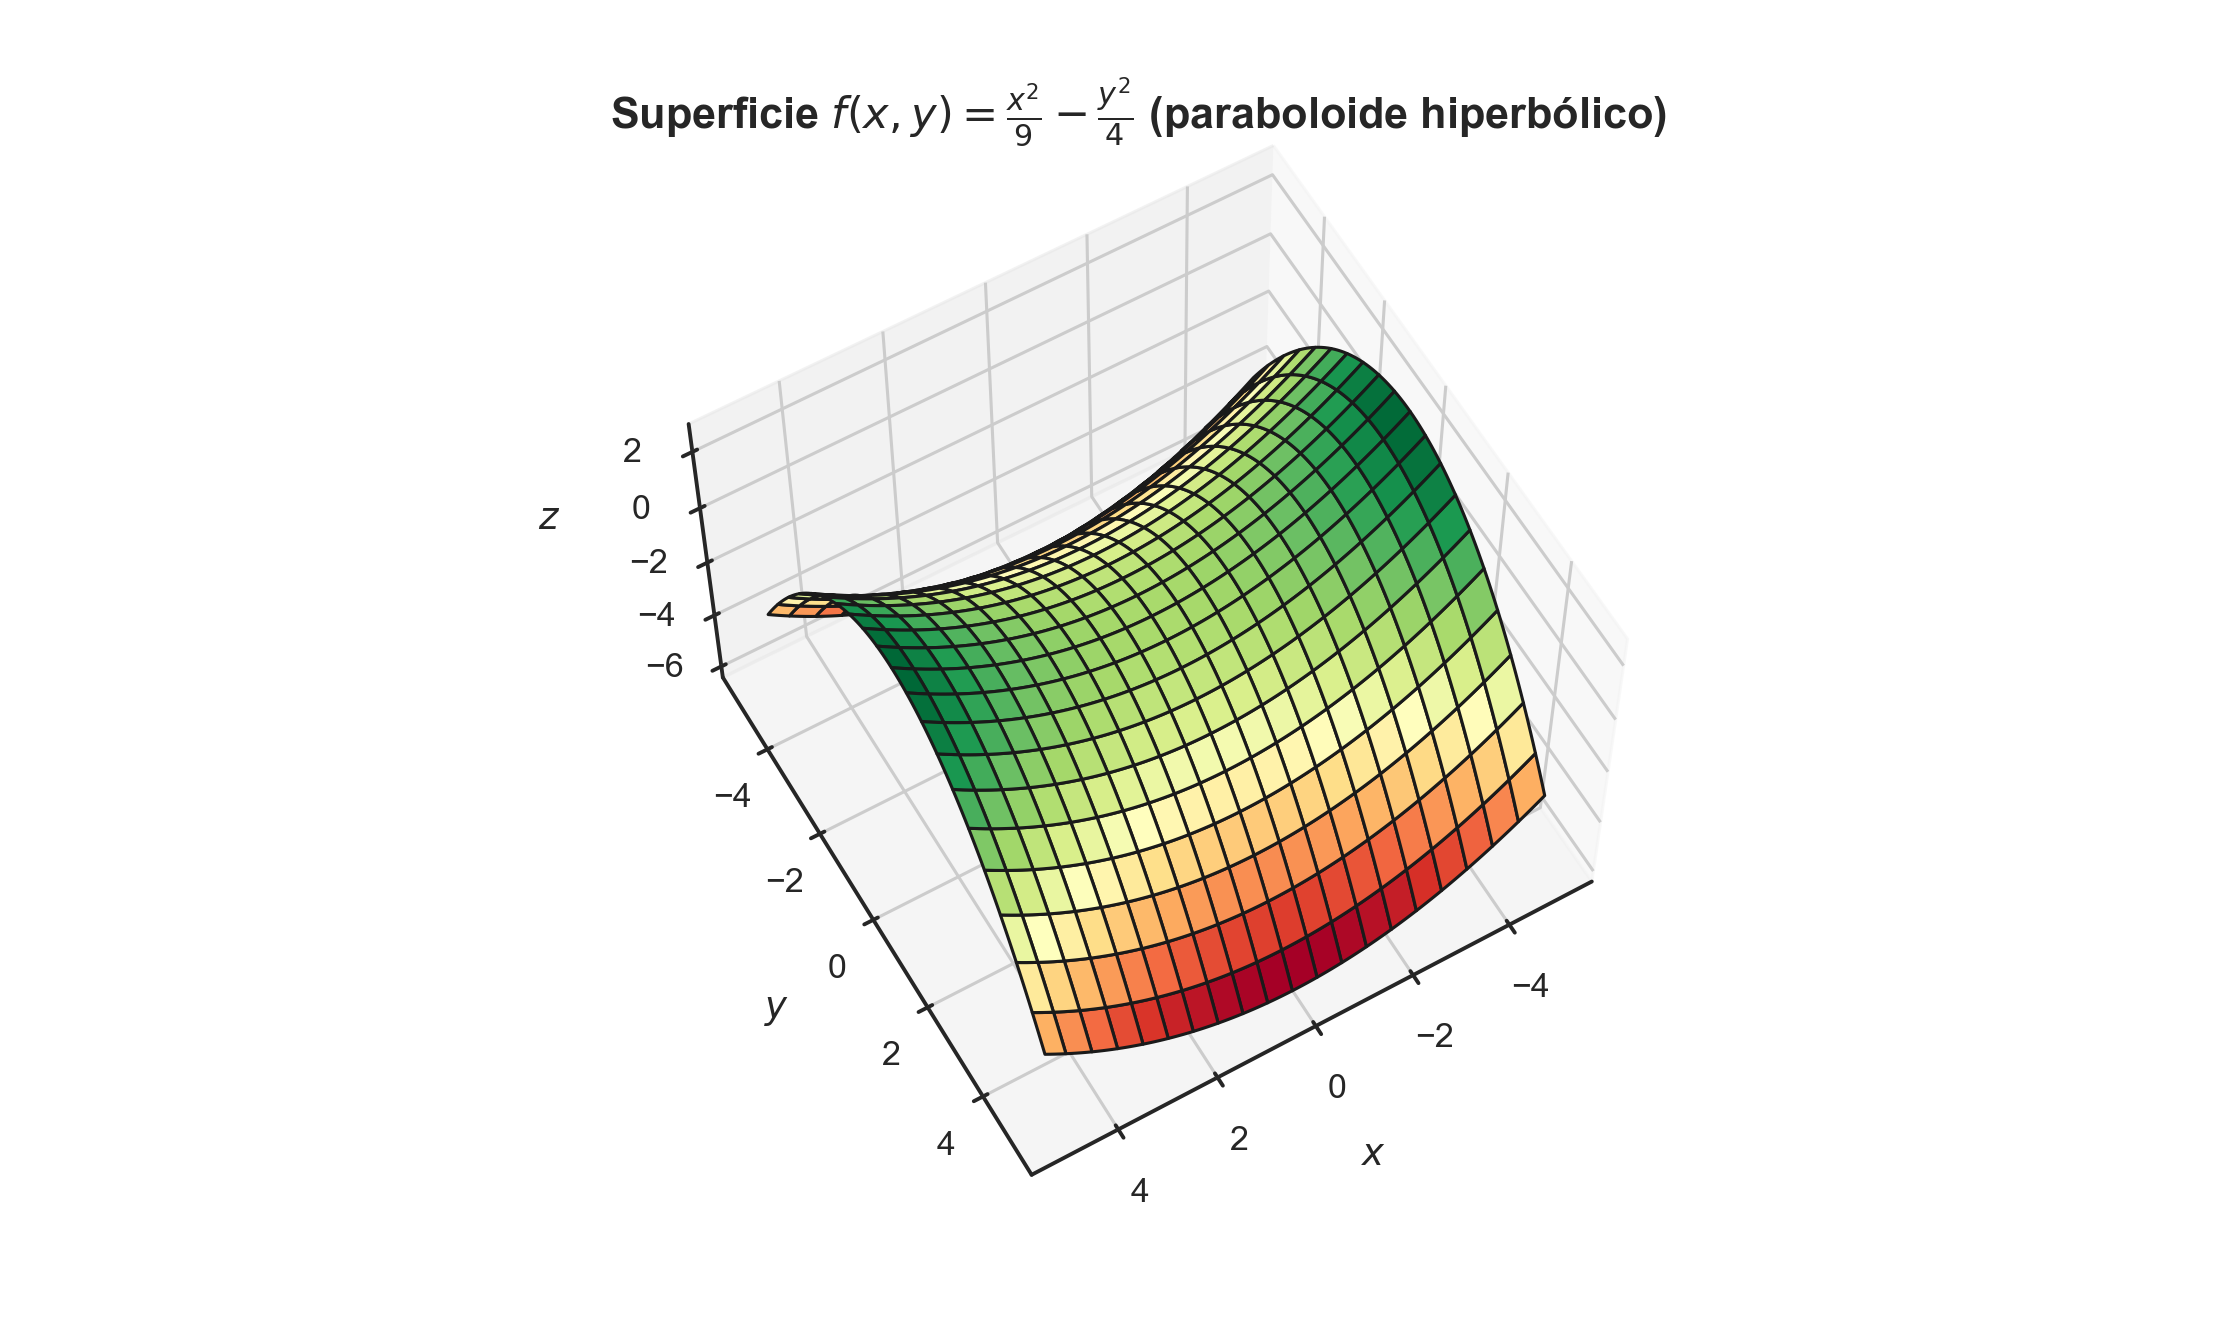

In [14]:
# Y construimos el gráfico de la superficie.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap='RdYlGn', edgecolor='k')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title(
    r'Superficie $f\left( x,y\right)  =\frac{x^{2}}{9} -\frac{y^{2}}{4}$ (paraboloide hiperbólico)', 
    fontsize=14, fontweight="bold", pad=10
)
ax.view_init(60, 60);

<IPython.core.display.Javascript object>


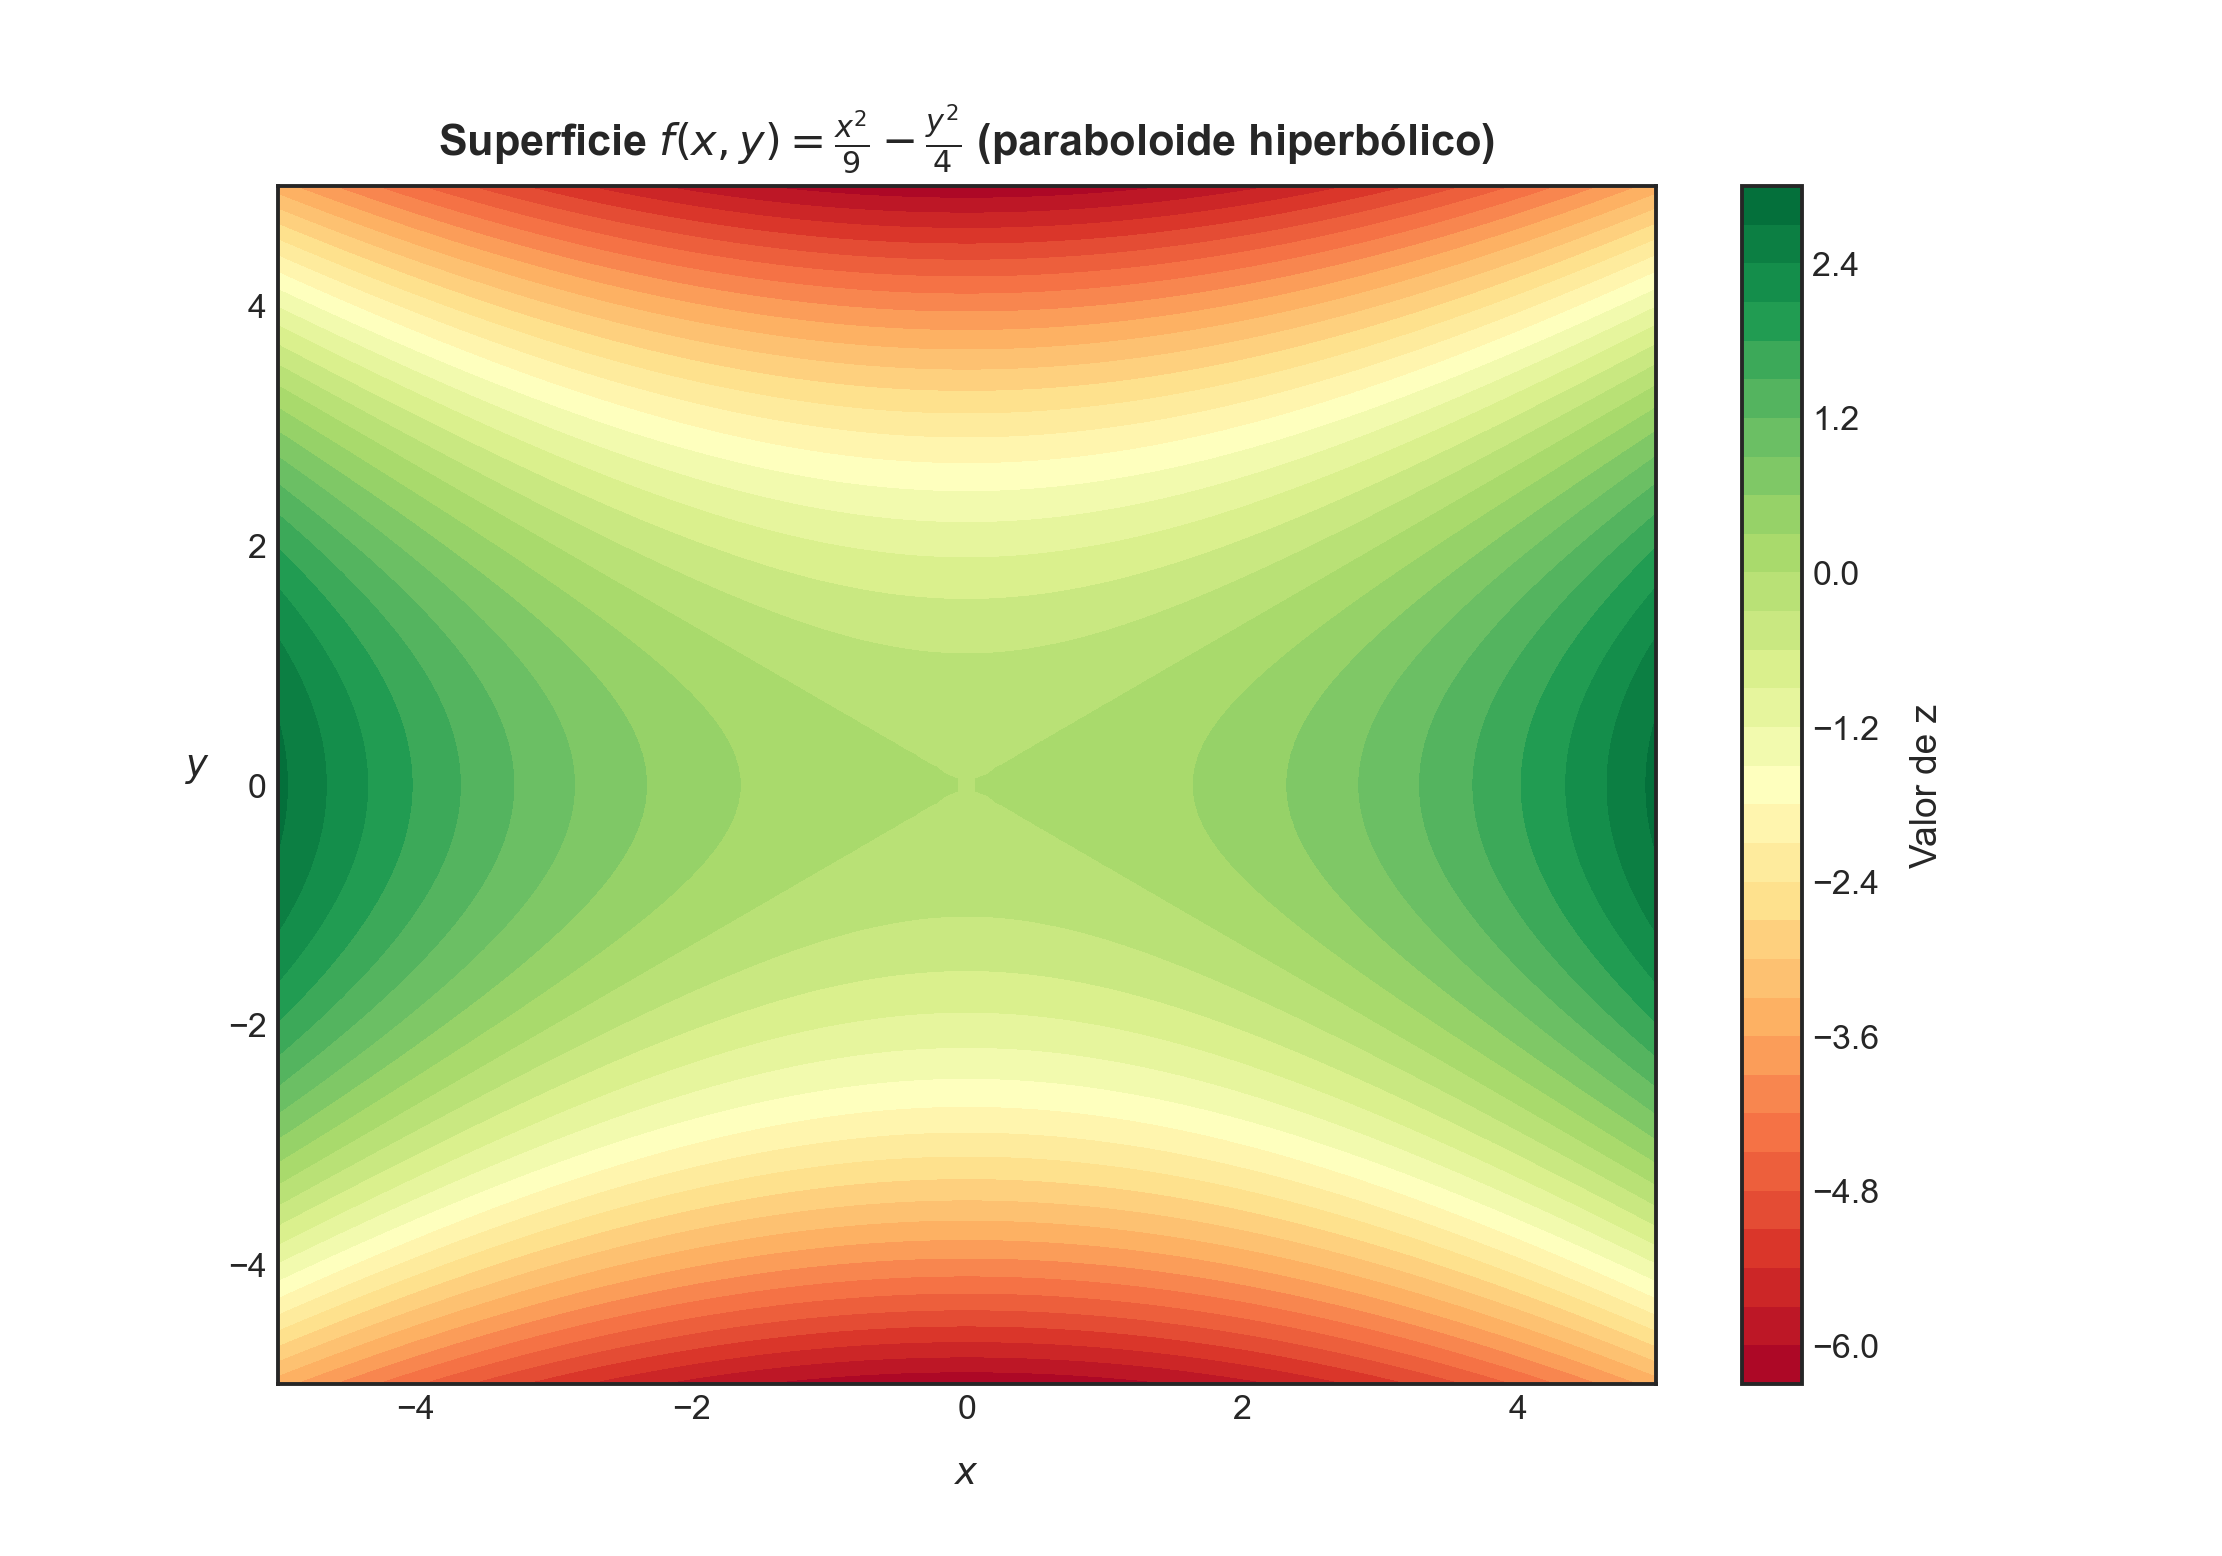

In [15]:
# Y creamos un gráfico de contorno completo para visualizar este mínimo global en 2D.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X, Y, Z, levels=30, cmap='RdYlGn')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10, rotation=0)
ax.set_title(
    r'Superficie $f\left( x,y\right)  =\frac{x^{2}}{9} -\frac{y^{2}}{4}$ (paraboloide hiperbólico)', 
    fontsize=14, fontweight="bold", pad=10
)
cb = plt.colorbar(p)
cb.set_label("Valor de z", fontsize=12, labelpad=10);

Sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en el conjunto abierto $U$ de $\mathbb{R}^{n}$ y sea $\mathbf{x}_{0}$ un punto interior a $U$. Admitamos que $f$ es de clase $C^{2}$ en $U$; es decir, las derivadas parciales de segundo orden $\frac{\partial^{2} f}{\partial x_{i}\partial x_{j}}$ existen y son continuas en $\mathbf{x}_{0}$ (para $i,j\in \mathbb{N}, 1\leq i\leq n, 1\leq j\leq n$). A la matriz cuadrada de orden $n$, definida como

$$\mathbf{H} \left( \mathbf{x}_{0} \right)  =\left( \frac{\partial^{2} f}{\partial x_{i}\partial x_{j}} \left( \mathbf{x}_{0} \right)  \right)_{i,j=1,2,...,n}  =\displaystyle \left( \begin{array}{ccc}\displaystyle \frac{\partial^{2} f}{\partial x^{2}_{1}} &\cdots &\displaystyle \frac{\partial^{2} f}{\partial x_{1}\partial x_{n}} \\ \vdots &\ddots &\vdots \\ \displaystyle \frac{\partial^{2} f}{\partial x_{n}\partial x_{1}} &\cdots &\displaystyle \frac{\partial^{2} f}{\partial x^{2}_{n}} \end{array} \right)$$
</p> <p style="text-align: right;">$(3.1)$</p>

se le llama **matriz Hessiana** de la función $f$ en el punto $x_{0}$. Se denota, conforme la Ec. (3.1), como $\mathbf{H} \left( \mathbf{x}_{0} \right)$.

Consideremos una matriz cuadrada arbitraria $\mathbf{A}\in \mathbb{R}^{n\times n}$. En términos explíctos, la matriz $\mathbf{A}$ puede esribirse como

$$\mathbf{A} =\left\{ a_{ij}\right\}  =\left( \begin{matrix}a_{11}&a_{12}&\cdots &a_{1n}\\ a_{21}&a_{22}&\cdots &a_{2n}\\ \vdots &\vdots &\ddots &\vdots \\ a_{n1}&a_{n2}&\cdots &a_{nn}\end{matrix} \right)$$
</p> <p style="text-align: right;">$(3.2)$</p>

Definimos las $n-1$ sub-matrices angulares de $\mathbf{A}$ como las matrices:

$$\triangle_{1} =a_{11}\  ;\  \triangle_{2} =\left( \begin{matrix}a_{11}&a_{12}\\ a_{21}&a_{22}\end{matrix} \right)  \  ;\  \triangle_{3} =\left( \begin{matrix}a_{11}&a_{12}&a_{13}\\ a_{21}&a_{22}&a_{23}\\ a_{31}&a_{32}&a_{33}\end{matrix} \right)  \  ;\  \cdots \  ;\  \triangle_{n-1} =\left( \begin{matrix}a_{11}&a_{12}&\cdots &a_{1,n-1}\\ a_{21}&a_{22}&\cdots &a_{2,n-1}\\ \vdots &\vdots &\ddots &\vdots \\ a_{n-1,1}&a_{n-1,2}&\cdots &a_{n-1,n-1}\end{matrix} \right)$$
</p> <p style="text-align: right;">$(3.3)$</p>

Diremos que la matriz $\mathbf{A}$ es definida positiva si su determinante es positivo, y si los determinantes de sus sub-matrices angulares son todos positivos. Es decir, si

$$\det \left( \triangle_{k} \right)  >0\  ;\  \forall k\leq n-1$$
</p> <p style="text-align: right;">$(3.4)$</p>

## Valores extremos de funciones.

### Caso no restringido.
Vamos a apoyarnos de los conceptos anteriores para definir un criterio directo para la determinación de valores extremos de una función en un caso de optimización no restringida. Para ello, sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en un conjunto abierto $U$ de $\mathbb{R}^{n}$. Consideremos un punto $\mathbf{x}_{0}$ que es *candidato a solución* de un problema de optimización no restringida, ya que las derivadas parciales de $f$ evaluadas en $\mathbf{x}_{0}$ son todas nulas. Es decir,

$$\frac{\partial f}{\partial x_{i}} \left( \mathbf{x}_{0} \right)  =0\  ;\  1\leq i\leq n$$
</p> <p style="text-align: right;">$(3.5)$</p>

Al punto $\mathbf{x}_{0}$ lo llamamos *candidato a solución* porque la condición anterior es necesaria, pero no suficiente, para garantizar la existencia de un mínimo o un máximo local de $f$ en $\mathbf{x}_{0}$. Sin embargo, la matriz Hessiana nos permite formular un criterio de existencia para tales valores en virtud de su estructura. Dicho criterio puede resumirse como sigue:

- Si todas las sub-matrices angulares de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ tienen determinante positivo (es decir, la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ es definida positiva), entonces la función $f$ tiene un **mínimo local** en $\mathbf{x}_{0}$.
- Si todas las sub-matrices angulares de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ tienen determinantes con signos alternados, partiendo con un signo negativo, entonces la función $f$ tiene un **máximo local** en $\mathbf{x}_{0}$.
- Si el determinante de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ es negativo, entonces $\mathbf{x}_{0}$ es un **punto de ensilladura** de $f$.
- Si el determinante de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ es nulo (es decir, la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ no es invertible en $\mathbf{x}_{0}$), entonces no podemos determinar si $\mathbf{x}_{0}$ es un valor extremo (máximo o minimo) de $f$.

Luego, para un problema de optimización no restringida donde conocemos explicitamente la función objetivo $f$, su solución dependerá íntegramente de los valores en un punto $\mathbf{x}_{0}$ *candidato a solución* de las derivadas parciales de $f$, y de la matriz Hessiana $\mathbf{H} \left( \mathbf{x}_{0} \right)$ de $f$.

### Caso restringido incompleto - Multiplicadores de Lagrange.
En el contexto de los problemas de optimización, el método de los multiplicadores de Lagrange es un procedimiento para encontrar los máximos y mínimos de funciones de múltiples variables sujetas a restricciones. Este método reduce el problema restringido con $n$ variables a uno sin restricciones de $n+k$ variables, donde $k$ es igual al número de restricciones, y cuyas ecuaciones pueden ser resueltas más fácilmente. Estas nuevas variables escalares desconocidas, una para cada restricción, son llamadas **multiplicadores de Lagrange**. El método establece que los puntos donde la función tiene un extremo condicionado con $k$ restricciones, están entre los puntos estacionarios de una nueva función sin restricciones construida como una combinación lineal de la función y las funciones implicadas en las restricciones, cuyos coeficientes son los multiplicadores.

Formalmente, podemos definir este método como sigue: Sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en un conjunto abierto $U$ de $\mathbb{R}^{n}$. Consideremos el **problema de optimización restringida incompleto**, descrito por

$$\begin{array}{ll}\min_{\mathbf{x} } &f\left( \mathbf{x} \right)  \\ \mathrm{s} .\mathrm{a} .:&h_{j}\left( \mathbf{x} \right)  =0\end{array}$$
</p> <p style="text-align: right;">$(3.6)$</p>

Para $1\leq j\leq m$, donde las $m$ ecuaciones $h_{j}(\mathbf{x})$ son las **restricciones** del problema. Definimos el **lagrangiano** $\mathcal{L}$ como

$$\mathcal{L} \left( \mathbf{x} ,\lambda_{j} \right)  =f\left( \mathbf{x} \right)  +\sum^{m}_{j=1} \lambda_{j} h_{j}\left( \mathbf{x} \right)$$
</p> <p style="text-align: right;">$(3.7)$</p>

Dado que $h_{j}(\mathbf{x})$ para todo $1\leq j\leq m$, el problema restringido (3.6) es equivalente entonces a la minimización del lagrangiano $\mathcal{L}(x,\lambda_{j})$. De esta manera, calculando las correspondientes derivadas parciales, obtenemos que los *candidatos a solución* del problema (3.6) satisfacen las siguientes ecuaciones:

$$\frac{\partial \mathcal{L} }{\partial x_{i}} \left( \mathbf{x} ,\lambda_{j} \right)  =0\Longleftrightarrow \frac{\partial f}{\partial x_{i}} =-\sum^{m}_{j=1} \lambda_{j} \frac{\partial h_{j}\left( \mathbf{x} \right)  }{\partial x_{i}} \  ;\  i=1,...,n$$
</p> <p style="text-align: right;">$(3.8)$</p>

Los valores $\lambda_{j}$ son llamados multiplicadores de Lagrange. Por lo tanto, dichos multiplicadores se determinan a partir de las ecuaciones con las restricciones y conjuntamente se obtiene un extremo para $\mathcal{L}$ que, al mismo tiempo, satisface las restricciones de nuestro problema de optimización original.

**Ejemplo 3.1: Un caso sencillo de problema no restringido:** Consideremos el paraboloide circular $z=x^{2}+y^{2}$. Como sabemos, esta función tiene un mínimo global en $\mathbf{x}=(0, 0, 0)$. Sin embargo, una posible restricción para este problema es que los puntos $(x,y,z)$ que estén sobre el paraboloide sean tales que $x+y+z=24$. Esto es, que pertenezcan a la curva resultante de la intersección del paraboloide con el plano $h(x,y)=24-x-y$. Queremos determinar, en este contexto, los puntos más cercano y alejado del plano $XY$ que pertenecen a dicha curva.

Es así que hemos definido un problema de optimización restringida, donde la situación geométrica es la siguiente:

In [16]:
# Definimos las correspondientes funciones que caracterizan el problema.
# Función objetivo.
def f(x, y):
    return x**2 + y**2

# Restricción.
def h(x, y):
    return 24 - x - y

In [17]:
# Generamos una grilla para evaluar estas funciones.
x = np.linspace(start=-5, stop=5, num=100)
y = np.linspace(start=-5, stop=5, num=100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
h = h(X, Y)

<IPython.core.display.Javascript object>


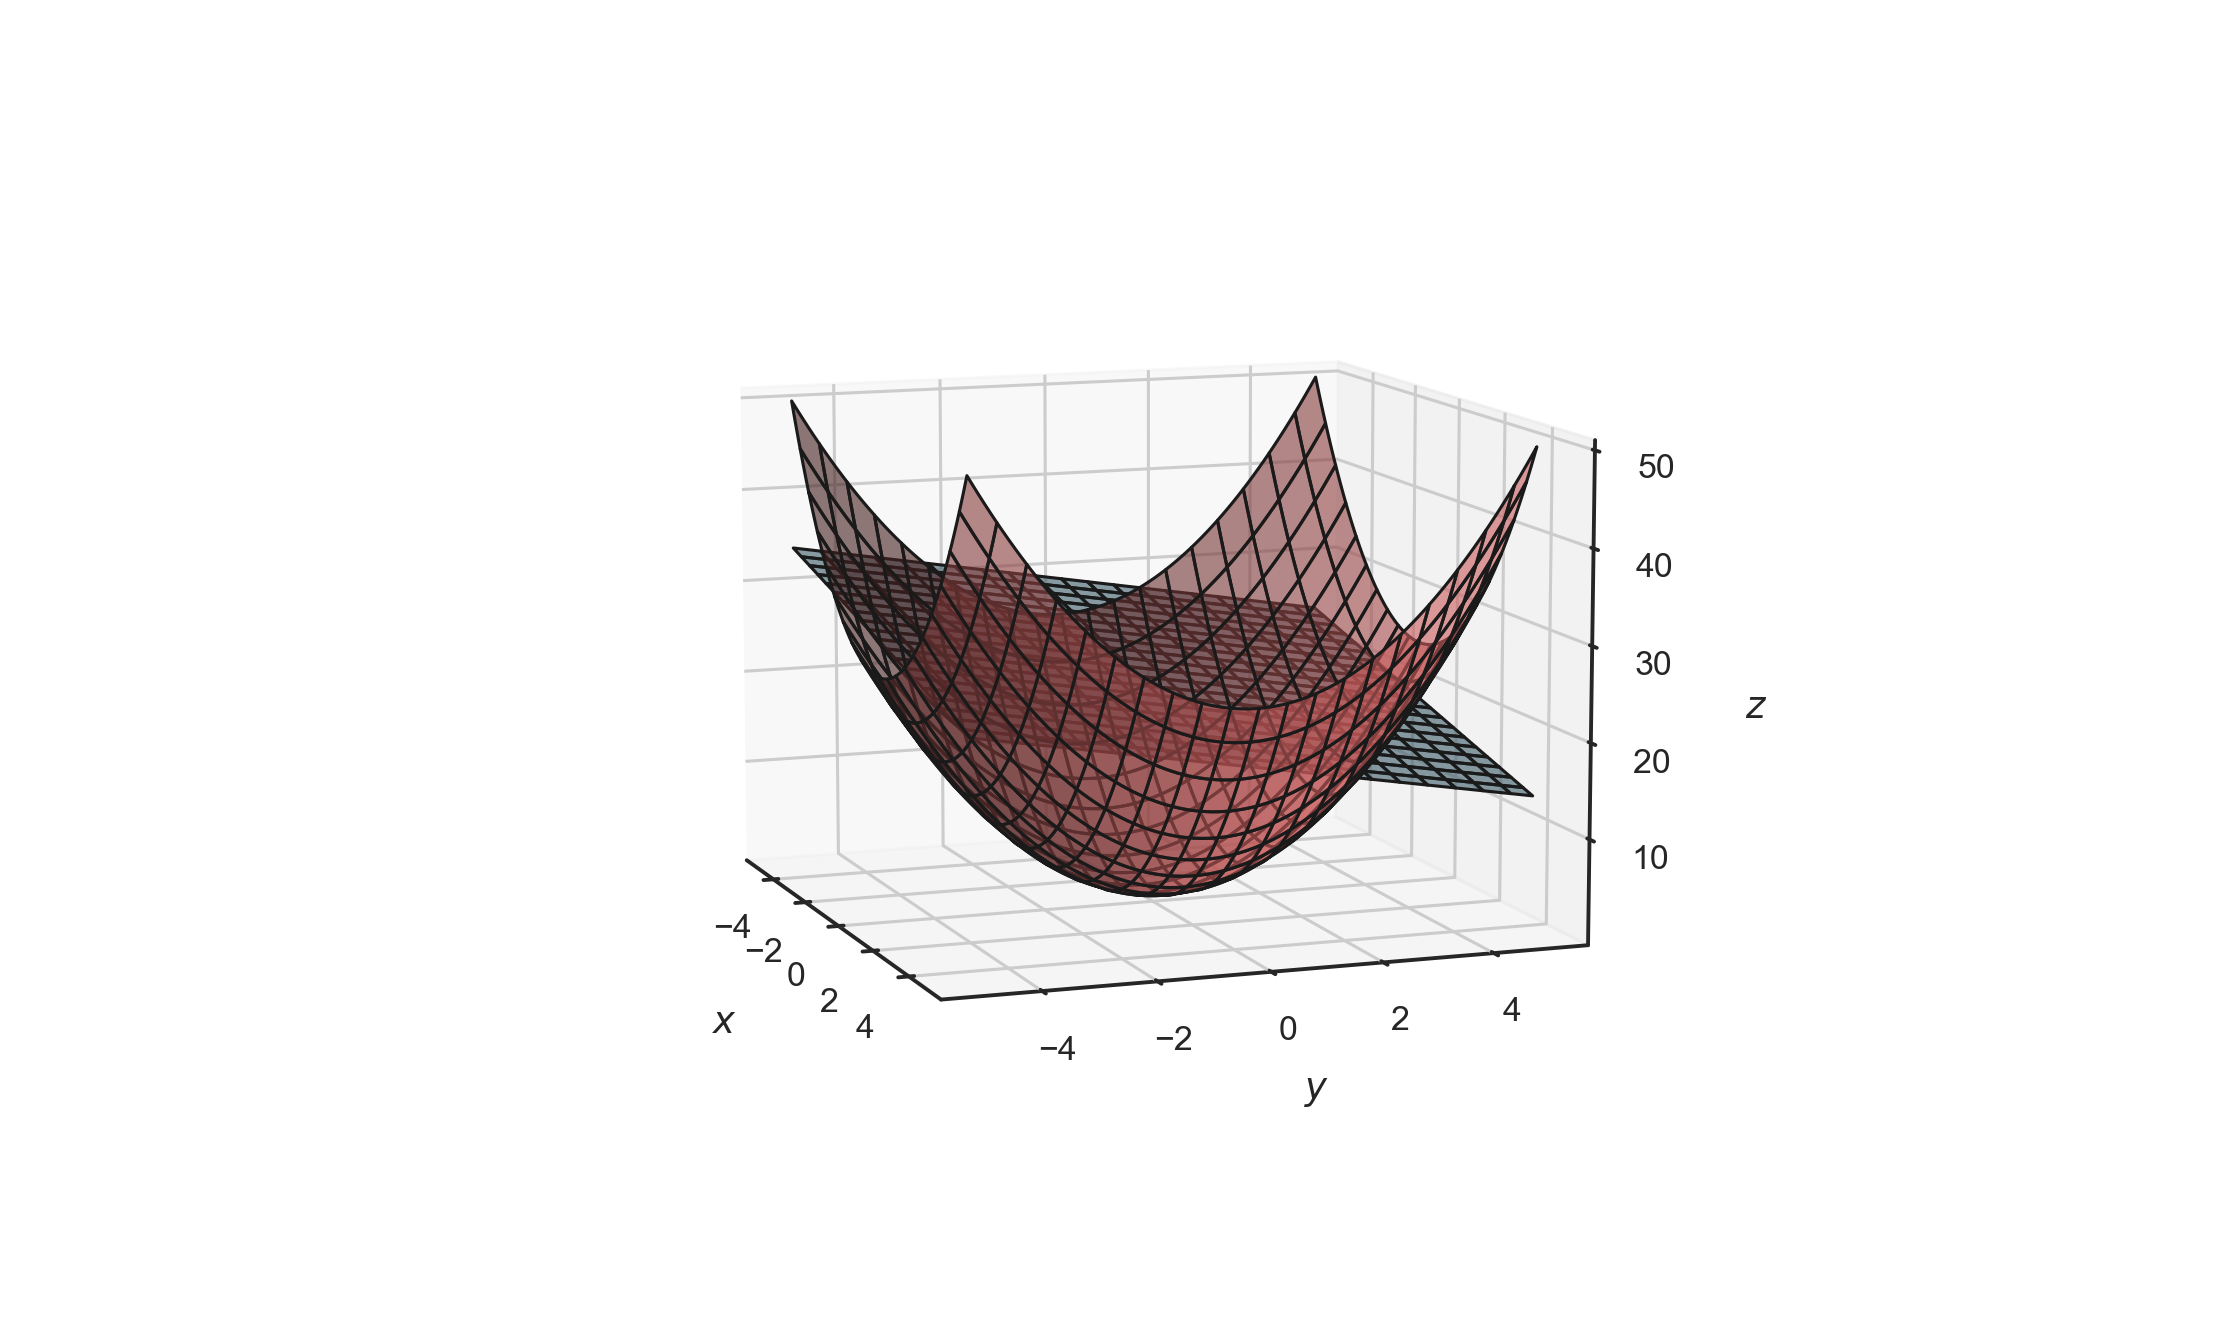

In [18]:
# Visualizamos la situación geométrica de este problema en tres dimensiones.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, color='indianred', edgecolor='k', alpha=0.6)
ax.plot_surface(X, Y, h, rstride=5, cstride=5, color='skyblue', edgecolor='k', alpha=0.6)
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.view_init(10, -20);

Debido a que la intersección entre ambas superficies ocurre en el semiespacio superior, es evidente que $z\geq 0$. La función a optimizar es un distancia vertical con respecto al plano $XY$, por lo que estamos frente a un problema con dos restricciones, que podemos escribir como

$$\begin{array}{ll}\displaystyle \min_{\left( x,y,z\right)  } &f\left( x,y,z\right)  =z\\ \mathrm{s} .\mathrm{a} .:&z=x^{2}+y^{2}\\ &x+y+z=24\end{array}$$
</p> <p style="text-align: right;">$(3.9)$</p>

Consideremos pues las funciones $h_{1}(x,y,z)=z-x^{2}-y^{2}$ y $h_{2}(x,y,z)=x+y+z-24$. Conforme la Ec. (3.7), el lagrangiano de este problema tiene la forma

$$\begin{array}{lll}\mathcal{L} \left( \mathbf{x} ,\lambda_{j} \right)  &=&f\left( x,y,z\right)  +\displaystyle \sum^{2}_{j=1} \lambda_{j} h_{j}\left( x,y,z\right)  \\ &=&z+\lambda_{1} \left( z-x^{2}-y^{2}\right)  +\lambda_{2} \left( x+y+z-24\right)  \end{array}$$
</p> <p style="text-align: right;">$(3.10)$</p>

Podemos resolver este problema fácilmente por medio de un cálculo simbólico vía **Sympy**. Definimos primeramente las variables que constituyen el problema, incluyendo por supuesto los multiplicadores de Lagrange:

In [19]:
# Definimos las variables del problema (por separado las variables reales y los multiplicadores).
x, y, z = sp.symbols("x, y, z", real=True)
lam1, lam2 = sp.symbols(r"\lambda_{1}, \lambda_{2}", real=True)

Luego construimos el lagrangiano $\mathcal{L}$ usando las variables simbólicas anteriores:

In [20]:
# Construimos el lagrangiano.
L = z + lam1*(z - x**2 - y**2) + lam2*(x + y + z - 24)

In [21]:
# Mostramos la expresión resultante en pantalla.
L

Ahora calculamos las derivadas parciales del lagrangiano con respecto a las variables $(x, y, z)$ y a los multiplicadores $(\lambda_{1}, \lambda_{2})$:

In [22]:
# Derivadas parciales del lagrangiano.
dL_dx = L.diff(x)
dL_dy = L.diff(y)
dL_dz = L.diff(z)
dL_dlam1 = L.diff(lam1)
dL_dlam2 = L.diff(lam2)

Igualando las derivadas parciales a cero llegamos a un sistema no lineal de ecuaciones que podemos resolver rápidamente como sigue:

In [23]:
# Resolvermos el sistema completo.
result = sp.solve([dL_dx, dL_dy, dL_dz, dL_dlam1, dL_dlam2], [x, y, z, lam1, lam2], dict=True)

In [24]:
# Mostramos el resultado en pantalla.
result

Por lo tanto, tenemos dos puntos críticos: $P_{1}=(3,3,18)$ y $P_{2}=(-4,-4,32)$, que corresponden a los puntos dentro de la curva resultante de la intersección del plano con el paraboloide que corresponden a las distancias mínima y máxima de dicha curva con respecto al plano $XY$. Tales distancias son $z=18$ y $z=32$. ◼

### Caso restringido general: Condiciones de Karush-Kuhn-Tucker (KKT).

#### Definición.
Sea $f:U\subseteq \mathbb{R}^{n} \rightarrow \mathbb{R}$ una función definida en un conjuntp abierto $U$ de $\mathbb{R}^{n}$. Sean además las funciones $g,h:D\subseteq U \rightarrow \mathbb{R}$ funciones definidas en un conjunto abierto $D$ tal que $D\subseteq U$. El problema

$$\begin{array}{ll}\displaystyle \min_{\mathbf{x} } &f\left( \mathbf{x} \right)  \\ \mathrm{s} .\mathrm{a} .:&g_{i}\left( \mathbf{x} \right)  \leq 0\\ &h_{j}\left( \mathbf{x} \right)  =0\end{array}$$
</p> <p style="text-align: right;">$(3.11)$</p>

donde $1\leq i\leq m$ y $1\leq j\leq p$, es llamado **problema de optimización restringido general**. La función $f$ es la función objetivo del problema, el conjunto $g_{i}(\mathbf{x})\leq 0$ constituye sus restricciones de desigualdad, y el conjunto $h_{j}(\mathbf{x})=0$ constituye sus restricciones de igualdad. Asumimos, sin pérdida de generalidad, que $U$ (y, por extensión, $D$) es un conjunto convexo de $\mathbb{R}^{n}$ (es decir, es tal que, para todo par de puntos $P_{1}$ y $P_{2}$ de $U$, el segumento que une ambos puntos está siempre contenido en $U$). Es posible, de la misma forma que para el caso restringido incompleto, construir un lagrangiano para el problema (3.11), definido como

$$\begin{array}{llll}&\mathcal{L} \left( \mathbf{x} ,\mathbf{\mu } ,\mathbf{\lambda } \right)  &=&f\left( \mathbf{x} \right)  +\overbrace{\mathbf{\mu }^{\top } \mathbf{g} \left( \mathbf{x} \right)  +\mathbf{\lambda }^{\top } \mathbf{h} \left( \mathbf{x} \right)  }^{\mathbf{\alpha } =\left( \mathbf{\mu }^{\top } ,\mathbf{\lambda }^{\top } \right)  } \\ \Longrightarrow &\mathcal{L} \left( \mathbf{x} ,\mathbf{\alpha } \right)  &=&f\left( \mathbf{x} \right)  +\mathbf{\alpha }^{\top } \left( \begin{array}{l}\mathbf{g} \left( \mathbf{x} \right)  \\ \mathbf{h} \left( \mathbf{x} \right)  \end{array} \right)  \end{array}$$
</p> <p style="text-align: right;">$(3.12)$</p>

donde $\mathbf{g}(\mathbf{x})$ y $\mathbf{h}(\mathbf{x})$ son campos vectoriales definidos como $\mathbf{g}(\mathbf{x})=\left( g_{1}\left( \mathbf{x} \right)  ,...,g_{m}\left( \mathbf{x} \right)  \right)^{\top }$ y $\mathbf{h} \left( \mathbf{x} \right)  =\left( h_{1}\left( \mathbf{x} \right)  ,...,h_{p}\left( \mathbf{x} \right)  \right)^{\top }$.

#### Problema dual.
El valor mínimo del lagrangiano, a saber, $\mathcal{G}(\mathbf{\mu}, \mathbf{\lambda})=\min_{\mathbf{x} } \mathcal{L} \left( \mathbf{x} ,\mathbf{\mu } ,\mathbf{\lambda } \right)$, se denomina función lagrangiana dual asociada al problema (3.12). Los valores reunidos en los vectores $\mathbf{\mu}$ y $\mathbf{\lambda}$ son llamados **multiplicadores de Karush-Kuhn-Tucker** (o multiplicadores KKT). Es posible siempre definir un problema de optimización de sentido inverso al representado en (3.12), llamado **problema dual** asociado al problema original, definido como

$$\begin{array}{rl}\displaystyle \min_{\mathbf{\mu } ,\mathbf{\lambda } } &\mathcal{G} \left( \mathbf{\mu } ,\mathbf{\lambda } \right)  \\ \mathrm{s} .\mathrm{a} .:&\mu_{i} \geq 0\  ;\  1\leq i\leq m\end{array}$$
</p> <p style="text-align: right;">$(3.13)$</p>

El problema dual tiene las siguientes importantes propiedades:

* El problema dual siempre es convexo (incluso si el problema original, llamado **problema primal**, no lo es).
* Los valores óptimos de las funciones objetivo primal ($f^{\star}$) y dual ($\mathcal{G}^{\star}$) siempre verifican la **condición débil de dualidad**: $f^{\star}\geq \mathcal{G}^{\star}$.
* **Condición de Slater:** Para un problema primal de tipo convexo, si existe un valor $\mathbf{x}_{0}\in D$ tal que $g_{i}(\mathbf{x}_{0})<0$ para todo $i=1,...,m$, y $h_{j}(\mathbf{x}_{0})=0$ para todo $j=1,...,p$, entonces se cumple la **condición fuerte de dualidad**: $f^{\star}=\mathcal{G}^{\star}$.

Para toda solución primal factible $\mathbf{x}_{0}$, y para todo par de soluciones duales factibles $\mathbf{\mu}_{0}$ y $\mathbf{\lambda}_{0}$, la diferencia $f(\mathbf{x}_{0})-\mathcal{G}(\mathbf{\mu}_{0},\mathbf{\lambda}_{0})$ es llamada **brecha de dualidad** entre $\mathbf{x}_{0}$ y el par $(\mathbf{\mu}_{0},\mathbf{\lambda}_{0})$. La brecha de dualidad es una cantidad que permite redefinir la condición de Slater como sigue: Si la brecha de dualidad del problema (3.12) es cero, entonces se cumple la condición fuerte de dualidad: $f^{\star}=\mathcal{G}^{\star}$.

#### Condiciones de Karush-Kuhn-Tucker (KKT).
Dado el problema primal (3.12), definimos las **condiciones necesarias de Karush-Kuhn-Tucker** (o condiciones KKT) como un conjunto de relaciones que permiten definir los candidatos a solución de dicho problema. Estas condiciones pueden también ser suficientes si se cumplen ciertas restricciones asociadas al problema.

Las condiciones KKT se listan a continuación para un candidato a solución $\mathbf{x}_{0}\in U$:

* $\displaystyle \nabla f\left( \mathbf{x}_{0} \right)  +\sum^{m}_{i=1} \mu_{i} \nabla g_{i}\left( \mathbf{x}_{0} \right)  +\sum^{p}_{j=1} \lambda_{j} \nabla h_{j}\left( \mathbf{x}_{0} \right)  \ni 0$ (estacionariedad).
* $\mu_{i}g_{i}(\mathbf{x}_{0})$ para todo $i=1,...,m$ (holguras complementarias).
* $g_{i}\left( \mathbf{x}_{0} \right)  \leq 0,h_{j}\left( \mathbf{x}_{0} \right)  =0\  ;\  \forall i=1,...,m\wedge j=1,...,p$ (factibilidad primal).
* $\mu_{i}\geq 0$ para todo $i=1,...,m$ (factibilidad dual).

Sean $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star}, \mathbf{\lambda}^{\star})$ soluciones óptimas para los problemas primal y dual, respectivamente, con brecha de dualidad igual a cero (es decir, se cumple la condición fuerte de dualidad, por ejemplo, bajo la condición de Slater). Siendo así, es posible demostrar que

$$\begin{array}{lll}f\left( \mathbf{x}^{\star } \right)  &=&\mathcal{G} \left( \mathbf{\mu }^{\star } ,\mathbf{\lambda }^{\star } \right)  \\ &=&\min_{\mathbf{x} } \left[ f\left( \mathbf{x} \right)  +\left( \mathbf{\mu }^{\star } \right)^{\top }  \mathbf{g} \left( \mathbf{x} \right)  +\left( \mathbf{\lambda }^{\star } \right)^{\top }  \mathbf{h} \left( \mathbf{x} \right)  \right]  \\ &\leq &f\left( \mathbf{x}^{\star } \right)  +\left( \mathbf{\mu }^{\star } \right)^{\top }  \mathbf{g} \left( \mathbf{x}^{\star } \right)  +\left( \mathbf{\lambda }^{\star } \right)^{\top }  \mathbf{h} \left( \mathbf{x}^{\star } \right)  \\ &\leq &f\left( \mathbf{x}^{\star } \right)  \end{array}$$
</p> <p style="text-align: right;">$(3.14)$</p>

En otras palabras, todas estas desigualdades son, de hecho, igualdades. Al respecto, se tienen dos consecuencias importantes:

- El punto $\mathbf{x}^{\star}$ minimiza el valor del lagrangiano $\mathcal{L}(\mathbf{x},\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ sobre $U$. Por lo tanto, el gradiente de $\mathcal{L}(\mathbf{x},\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ debe anularse en $\mathbf{x}=\mathbf{x}^\star$. Esta es, de hecho, la condición KKT de estacionariedad.
- Debemos tener que $\left( \mathbf{\mu }^{\star } \right)^{\top }  \mathbf{g} \left( \mathbf{x} \right)=0$ y, dado que cada término en la suma resultante es negativo, esto implica que $\mu^{\star }_{i} g_{i}\left( \mathbf{x}^{\star } \right)  =0$ para cada $i=1,...,m$. Esta es, de hecho, la condición KKT de holguras complementarias.

Las condiciones KKT de factibilidad primal y dual, por supuesto, se cumplen. Por lo tanto, hemos mostrado que, si $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ son las soluciones del problema primal y dual, respectivamente, con brecha de dualidad nula, entonces $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ cumplen con las condiciones KKT. Naturalmente, esto es válido si y sólo si $U$ y $D$ son conjuntos convexos.

#### Suficiencia.
Si existen $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ que satisfacen las condiciones KKT, entonces se tiene que

$$\begin{array}{lll}g\left( \mathbf{\mu }^{\star } ,\mathbf{\lambda }^{\star } \right)  &=&f\left( \mathbf{x}^{\star } \right)  +\left( \mathbf{\mu }^{\star } \right)^{\top }  \mathbf{g} \left( \mathbf{x}^{\star } \right)  +\left( \mathbf{\lambda }^{\star } \right)^{\top }  \mathbf{h} \left( \mathbf{x}^{\star } \right)  \\ &=&f\left( \mathbf{x}^{\star } \right)  \end{array}$$
</p> <p style="text-align: right;">$(3.15)$</p>

donde la primera igualdad es debida a la condición KKT de estacionariedad, y la segunda, a la condición KKT de holguras complementarias.

Por lo tanto, la brecha de dualidad es cero (y $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ son soluciones factibles para el problema primal y dual, respectivamente). Así, $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ son soluciones óptimas de ambos problemas, respectivamente. 

Hemos mostrado pues que, si $\mathbf{x}^{\star}$ y $(\mathbf{\mu}^{\star},\mathbf{\lambda}^{\star})$ satisfacen las condiciones KKT, entonces son soluciones óptimas de los problemas primal y dual, respectivamente.

En resumen, las condiciones de Karush-Kuhn-Tucker, en términos de la optimalidad de un *candidato* a solución:

- Son suficientes siempre.
- Son necesarias bajo la condición fuerte de dualidad.

No ahondaremos mucho más en los fundamentos teóricos de los problemas de optimización restringida de carácter general. Sin embargo, es evidente, de las condiciones KKT y de suficiencia para los candidatos a solución de un problema como (3.11), que, en general, es difícil que un problema de este tipo sea factible de tener una solución algebraicamente cerrada. Por lo tanto, nos enfocaremos de ahora en adelante en métodos computacionales que nos permitirán resolver cualquier problema de optimización de manera numérica. Incluso aunque no conozcamos explícitamente una función objetivo (es decir, no dispongamos de una fórmula para la misma), ni mucho menos sus derivadas.

## Implementación en `scipy.optimize`.

### Problemas no restringidos.
Como vimos previamente, un problema de optimización no restringida corresponde a uno tal que tiene como objetivo determinar la mejor solución a partir de todas las posibles soluciones factibles para dicho problema. Típicamente, cuando no existen restricciones que las variables deban cumplir, y tales variables son continuas y diferenciales en el dominio de definición, un problema de optimización puede escribirse en su forma estándar como un problema de minimización de una función del tipo $f:U\subseteq \mathbb{R}^{n} \longrightarrow \mathbb{R}$, donde $U$ es un conjunto abierto de $\mathbb{R}^{n}$. Notemos que siempre podremos convertir un problema de maximización a uno de minimización considerando la relación $\min(f(\mathbf{x}))=-\max(f(\mathbf{x}))$.

Vamos a estudiar algunos métodos de optimización provistos fundamentalmente por la librería **Scipy** en su módulo dedicado a la optimización, llamado `scipy.optimize`. En este módulo dispondremos de funciones dedicadas a la resolución de problemas de optimización de todo tipo, por medio de algoritmos muy diversos. Tales algoritmos requerirán siempre una cantidad determinada de información. Por lo tanto, la elección de uno u otro dependerá, por supuesto, de nuestro conocimiento del problema que deseamos resolver. En algunos casos, dispondremos de una función objetivo $f$ explícitamente definida y continua sobre un conjunto abierto (en general, convexo) $U$ de $\mathbb{R}^{n}$. Y, por lo tanto, podremos disponer de sus derivadas parciales en $U$. Sin embargo, en general, no dispondremos de una expresión explícita para $f$, lo que nos impedirá calcular sus derivadas, y en cuyo caso tendremos que hacer uso de algoritmos más generales que veremos más adelante.

Debido a que, en esta primera parte, nos abocaremos a resolver problemas no restringidos, haremos uso de una función objetivo bien conocida en el campo de la optimización matemática, conocida como **función de Rosenbrock**, y que es posible definirla en todo $\mathbb{R}^{n}$ como

$$f\left( \mathbf{x} \right)  =\sum^{n-1}_{i=1} 100\left( x_{i+1}-x^{2}_{i}\right)^{2}  +\left( 1-x_{i}\right)^{2}$$
</p> <p style="text-align: right;">$(3.16)$</p>

La función de Rosenbrock así definida es convexa y de clase $C^{\infty}$ en todo $\mathbb{R}^{n}$, y es típicamente utilizada para evaluar la precisión y rendimiento de muchos algoritmos de optimización numérica en términos computacionales. Su valor mínimo es $\mathbf{x}=\mathbf{0}$, y se obtiene en $x_{i}=1$ para todo $i=1,...,n$. Esta función es tan utilizada en el benchmarking de algoritmos de optimización que, incluso, viene precargada en muchísimas librerías dedicadas a la optimización en Python (y otros frameworks). Sin embargo, a fin de ejemplificar casos de uso, la definiremos nosotros mismos de forma manual. Para el caso del módulo `scipy.optimize`, toda función objetivo debe estar definida en Python de tal forma que su único argumento sea un arreglo unidimensional. Esto es porque **Scipy** siempre evalúa una observación a la vez:

In [25]:
# Definimos la función de Rosenbrock.
def rosen(x):
    return np.sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

Para tener una idea visual del recorrido de esta función, podemos graficarla para $n=2$. En este caso, la función de Rosenbrock toma la forma $f(x,y)=100(y-x^{2})^{2}+(1-x)^{2}$. De esta manera, definiremos primeramente una grilla de evaluación para dicha función por medio de areglos de **Numpy**:

In [26]:
# Definimos la grilla completa.
x = np.linspace(start=-2, stop=2, num=100)
y = np.linspace(start=-1, stop=3, num=100)
X, Y = np.meshgrid(x, y)

In [27]:
# Obtenemos los valores de la función de Rosenbrock en la grilla.
Z = 100 * (Y - X**2)**2 + (1 - X)**2

<IPython.core.display.Javascript object>


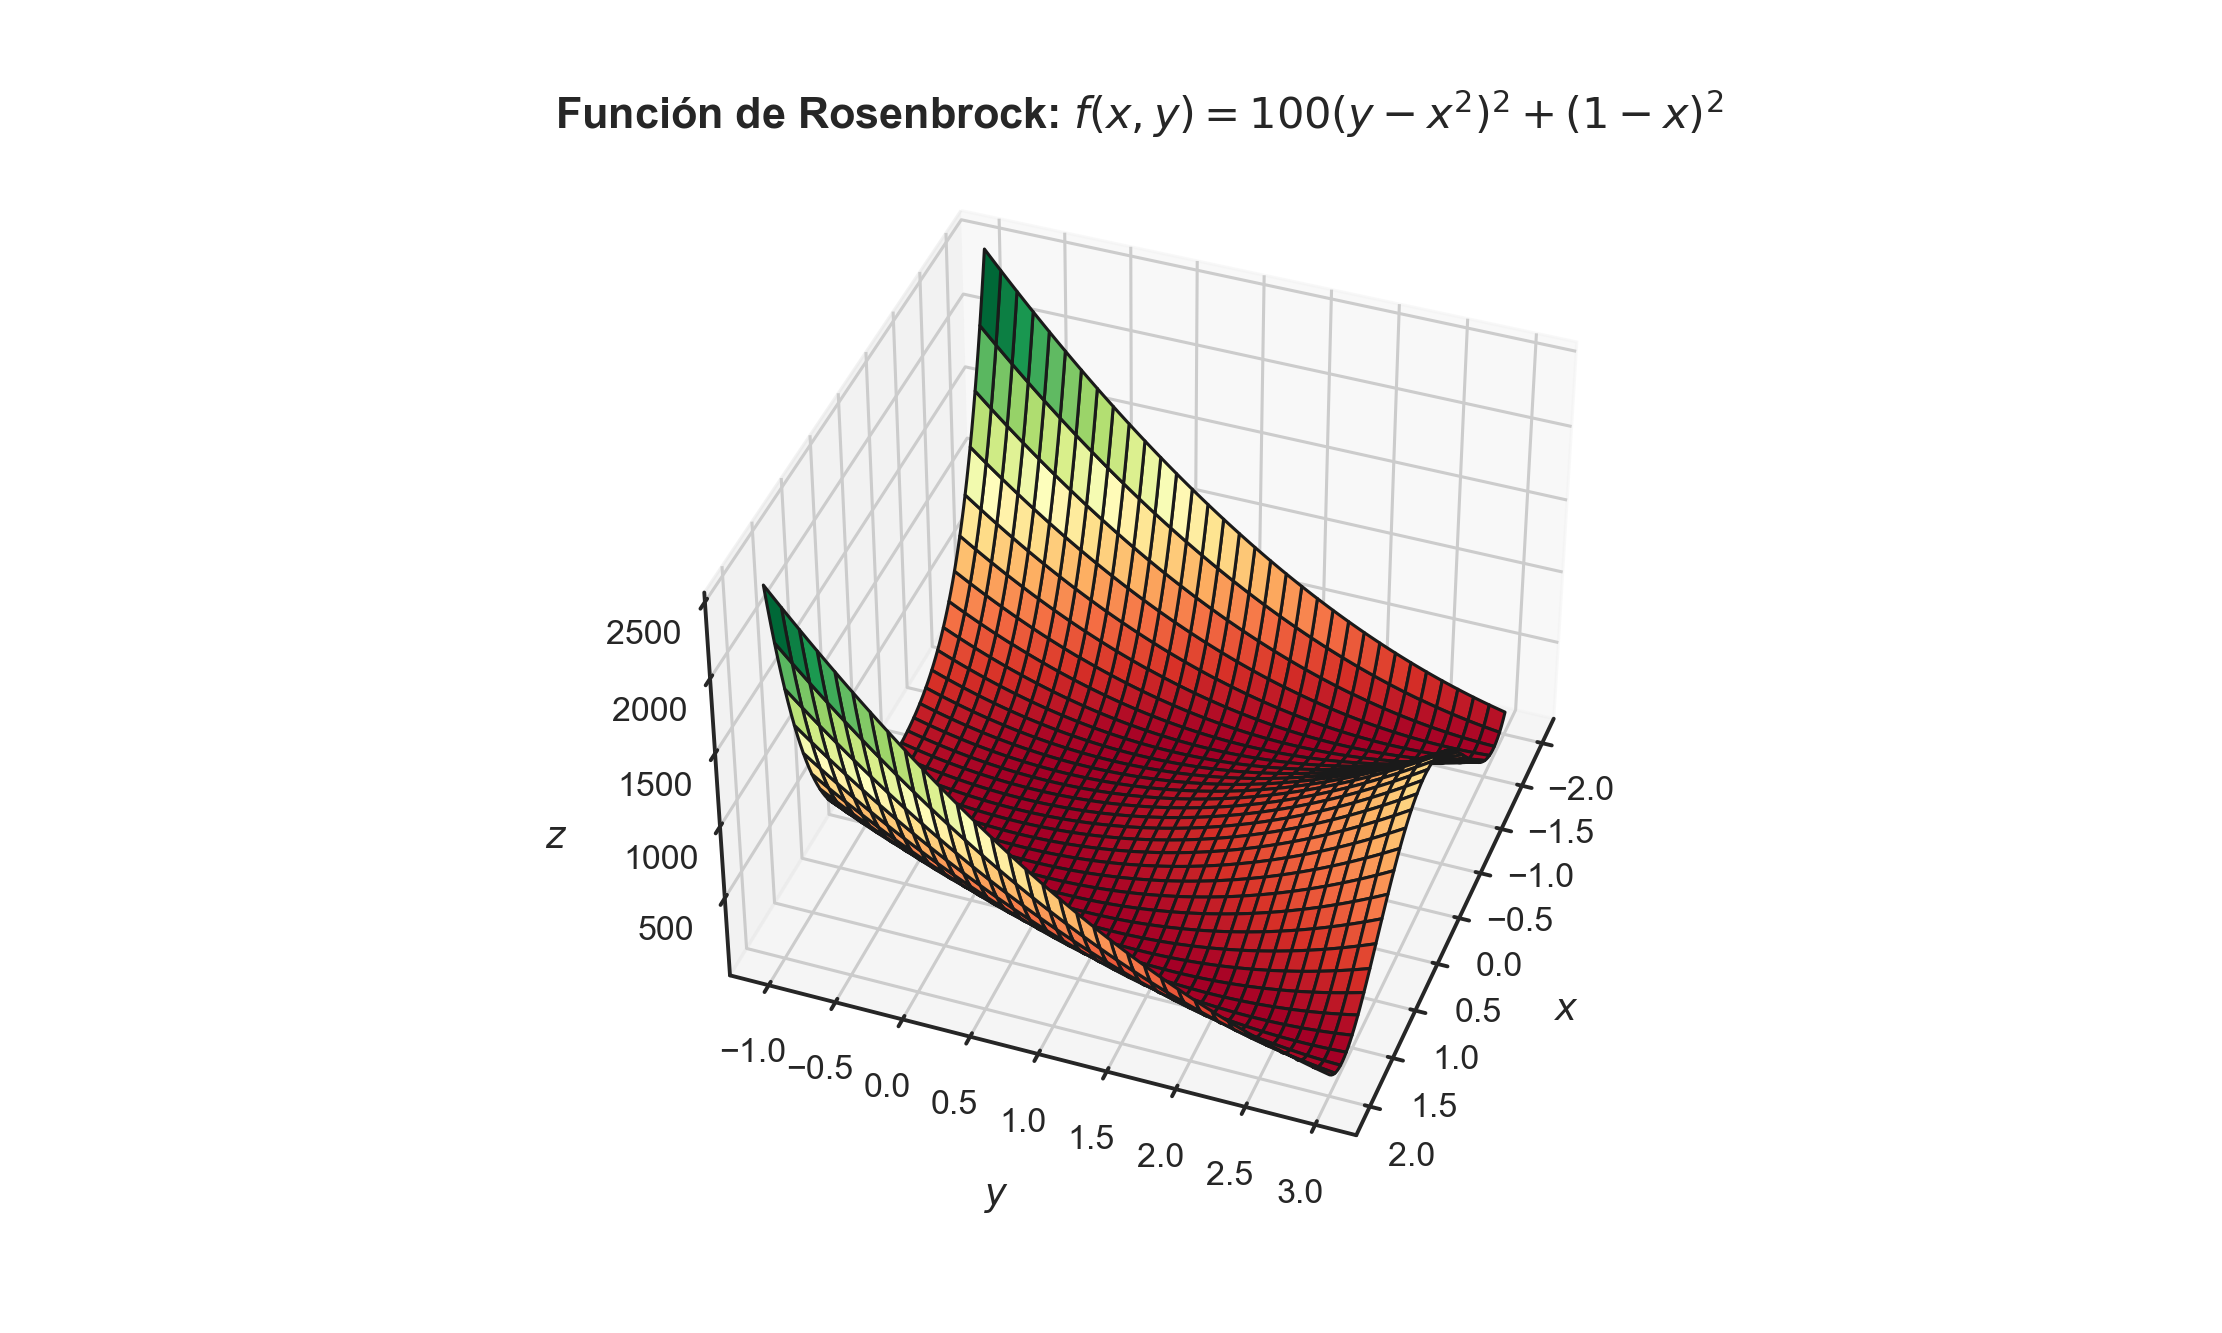

In [28]:
# Graficamos la superficie resultante de esta función.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, cmap='RdYlGn', edgecolor='k')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title(
    r'Función de Rosenbrock: $f(x,y)=100(y-x^{2})^{2}+(1-x)^{2}$', 
    fontsize=14, fontweight="bold", pad=10
)
ax.view_init(40, 20);

<IPython.core.display.Javascript object>


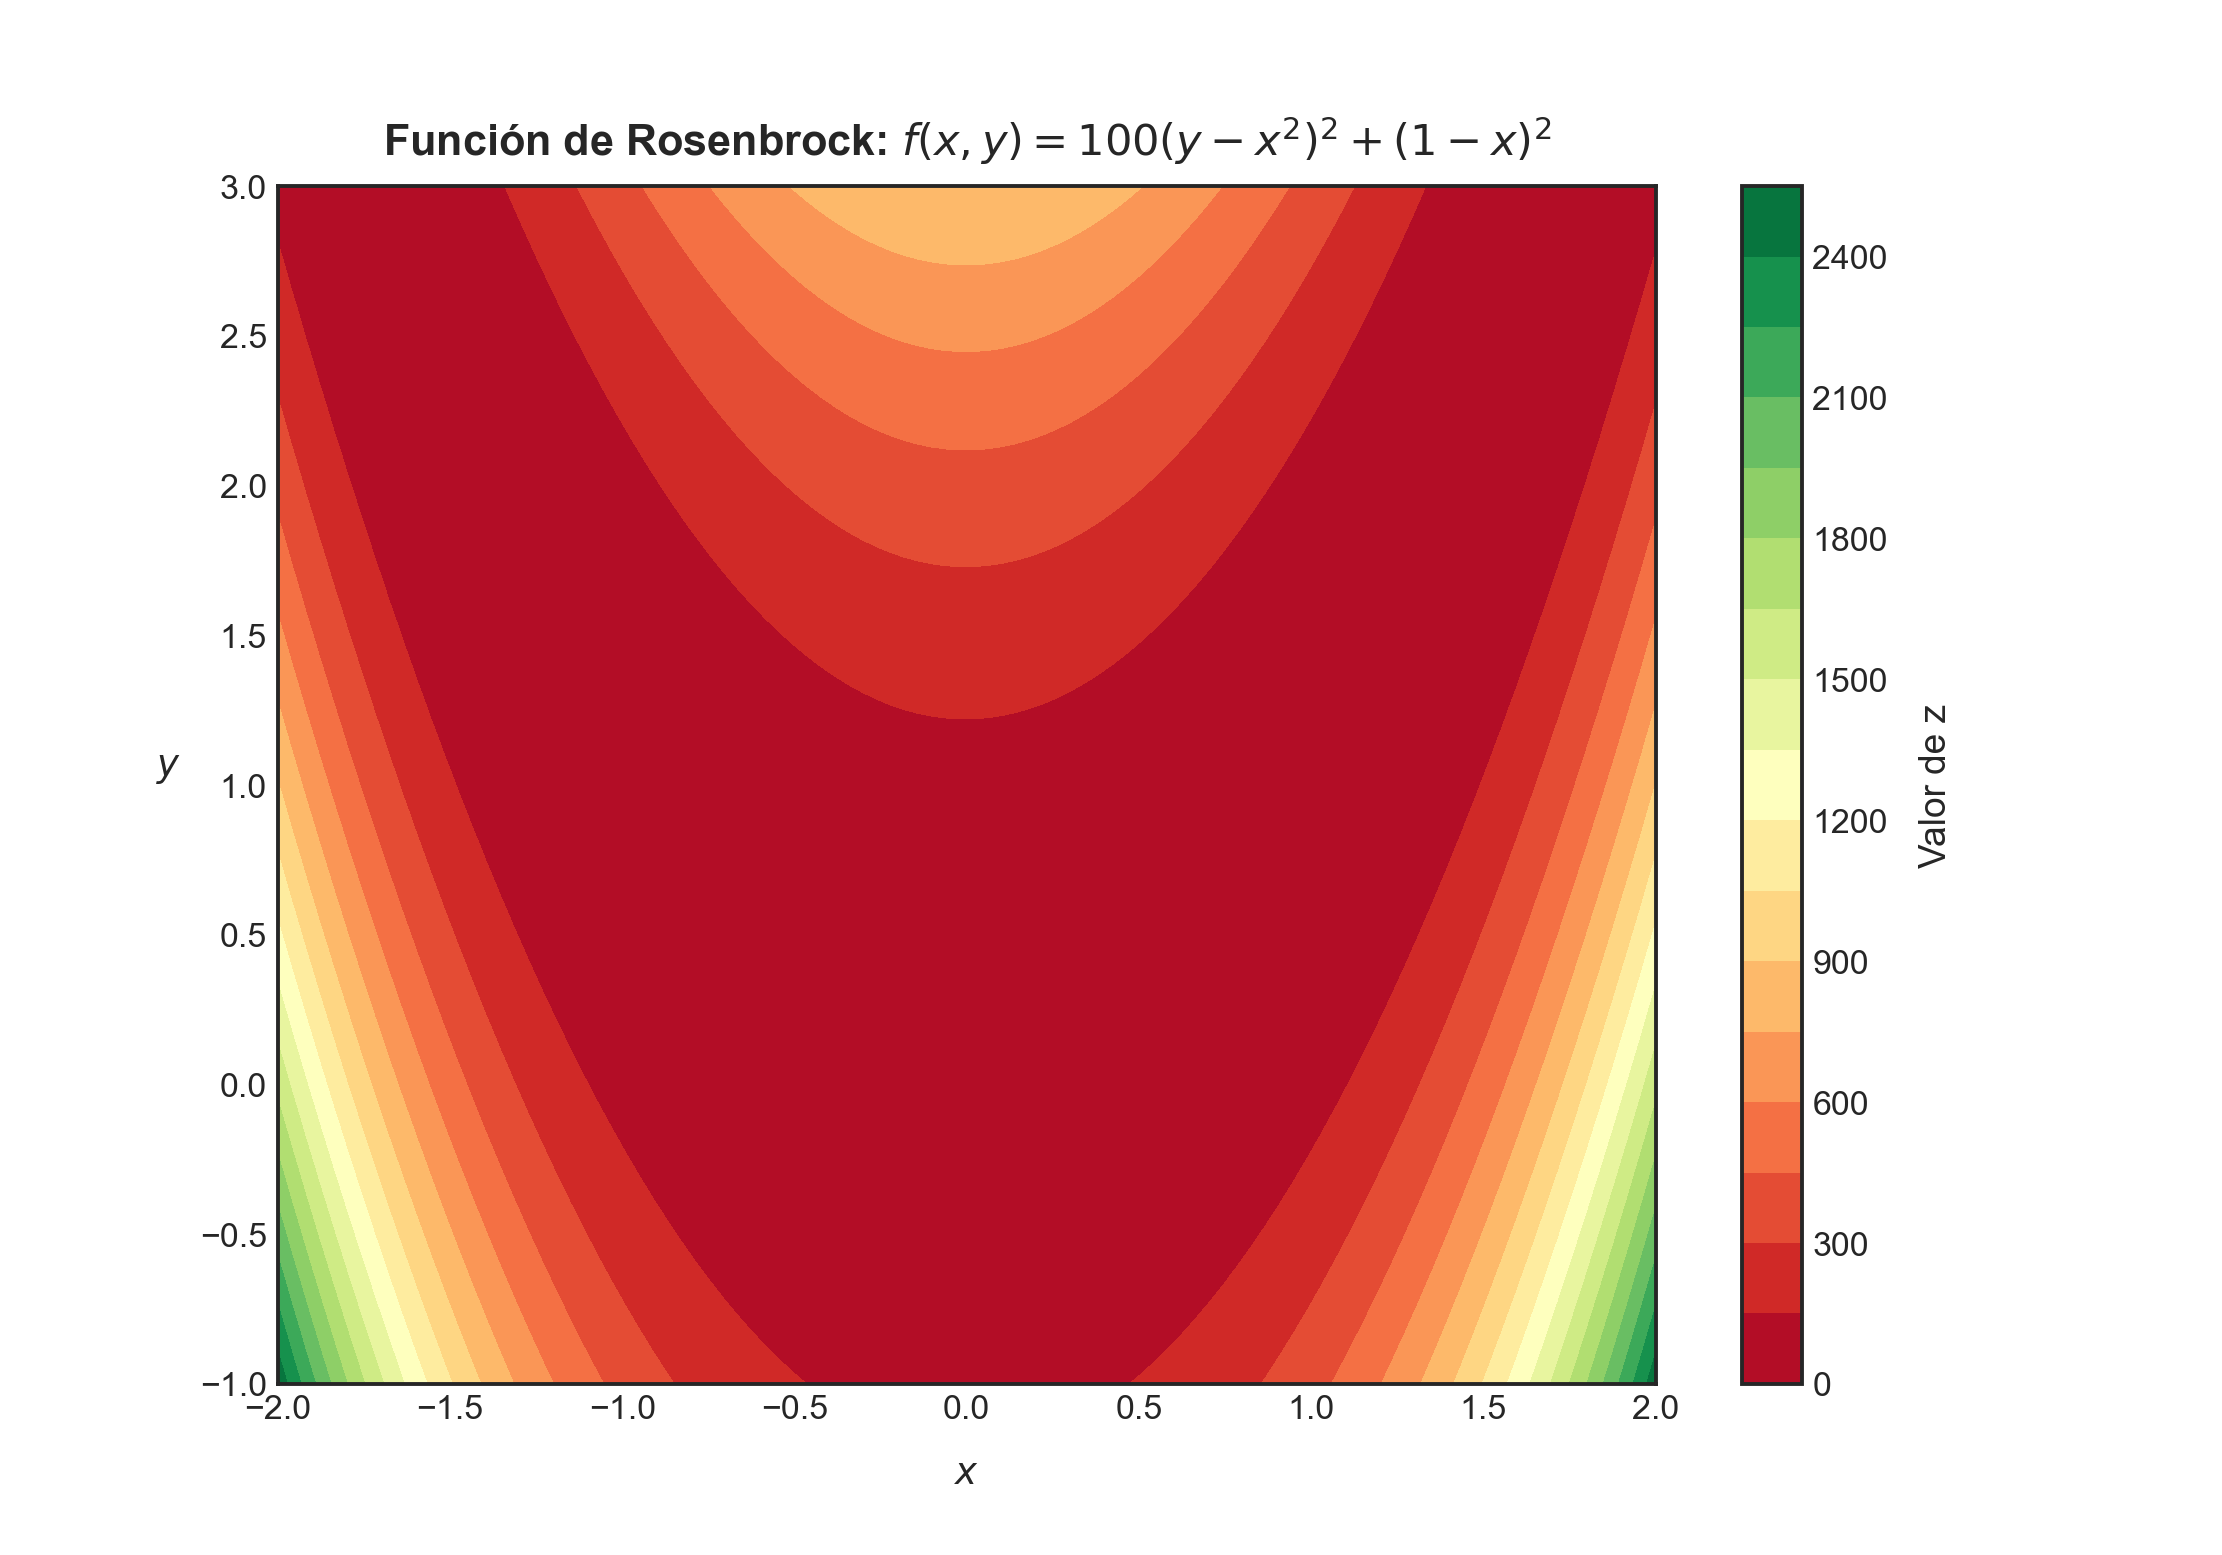

In [29]:
# Y creamos un gráfico de contorno completo para visualizar este mínimo global en 2D.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X, Y, Z, levels=20, cmap='RdYlGn')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10, rotation=0)
ax.set_title(
    r'Función de Rosenbrock: $f(x,y)=100(y-x^{2})^{2}+(1-x)^{2}$', 
    fontsize=14, fontweight="bold", pad=10
)
cb = plt.colorbar(p)
cb.set_label("Valor de z", fontsize=12, labelpad=10);

Otra función muy utilizada en el benchmark de algoritmos de optimización, y sin duda mucho más exigente, corresponde a la función de Rastrigin, que puede definirse como

$$f\left( \mathbf{x} \right)  =10n + \displaystyle \sum^{n}_{i=1} \left[ x^{2}_{i}-10\cos \left( 2\pi x_{i}\right)  \right]  $$
</p> <p style="text-align: right;">$(3.17)$</p>

De la misma forma que en el caso de la función de Rosenbrock, definiremos manualmente esta función para hacer evaluaciones de arreglos unidimensionales como sigue:

In [30]:
# Definimos la función de Rastrigin.
def rastrigin(x):
    return 10*x.shape[0] + np.sum(x**2 - 10*np.cos(2*x*np.pi))

Notemos que para $n=2$, la función de Rastrigin toma la forma $f\left( x,y\right)  =20+x^{2}+y^{2}-10\left( \cos \left( 2\pi x\right)  +\cos \left( 2\pi y\right)  \right)$. Se trata de una función no convexa y de tipo multimodal; es decir, con una cantidad enorme de extremos locales que dificultan los procedimientos de búsqueda de algoritmos de optimización de baja complejidad que, efectivamente, buscan valores óptimos en entornos locales. Si graficamos la función de Rastrigin en un entorno de $\mathbb{R}^{2}$, observaremos inmediatamente porqué dicha función se ha ganado a pulso el apodo de *la caja de huevos*:

In [31]:
# Definimos una grilla de búsqueda.
x = np.linspace(start=-5.14, stop=5.14, num=100)
y = np.linspace(start=-5.14, stop=5.14, num=100)
X, Y = np.meshgrid(x, y)

In [32]:
# Calculamos los valores de la función de Rastrigin sobre la grilla.
Z = 20 + X**2 + Y**2 - 10*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y))

<IPython.core.display.Javascript object>


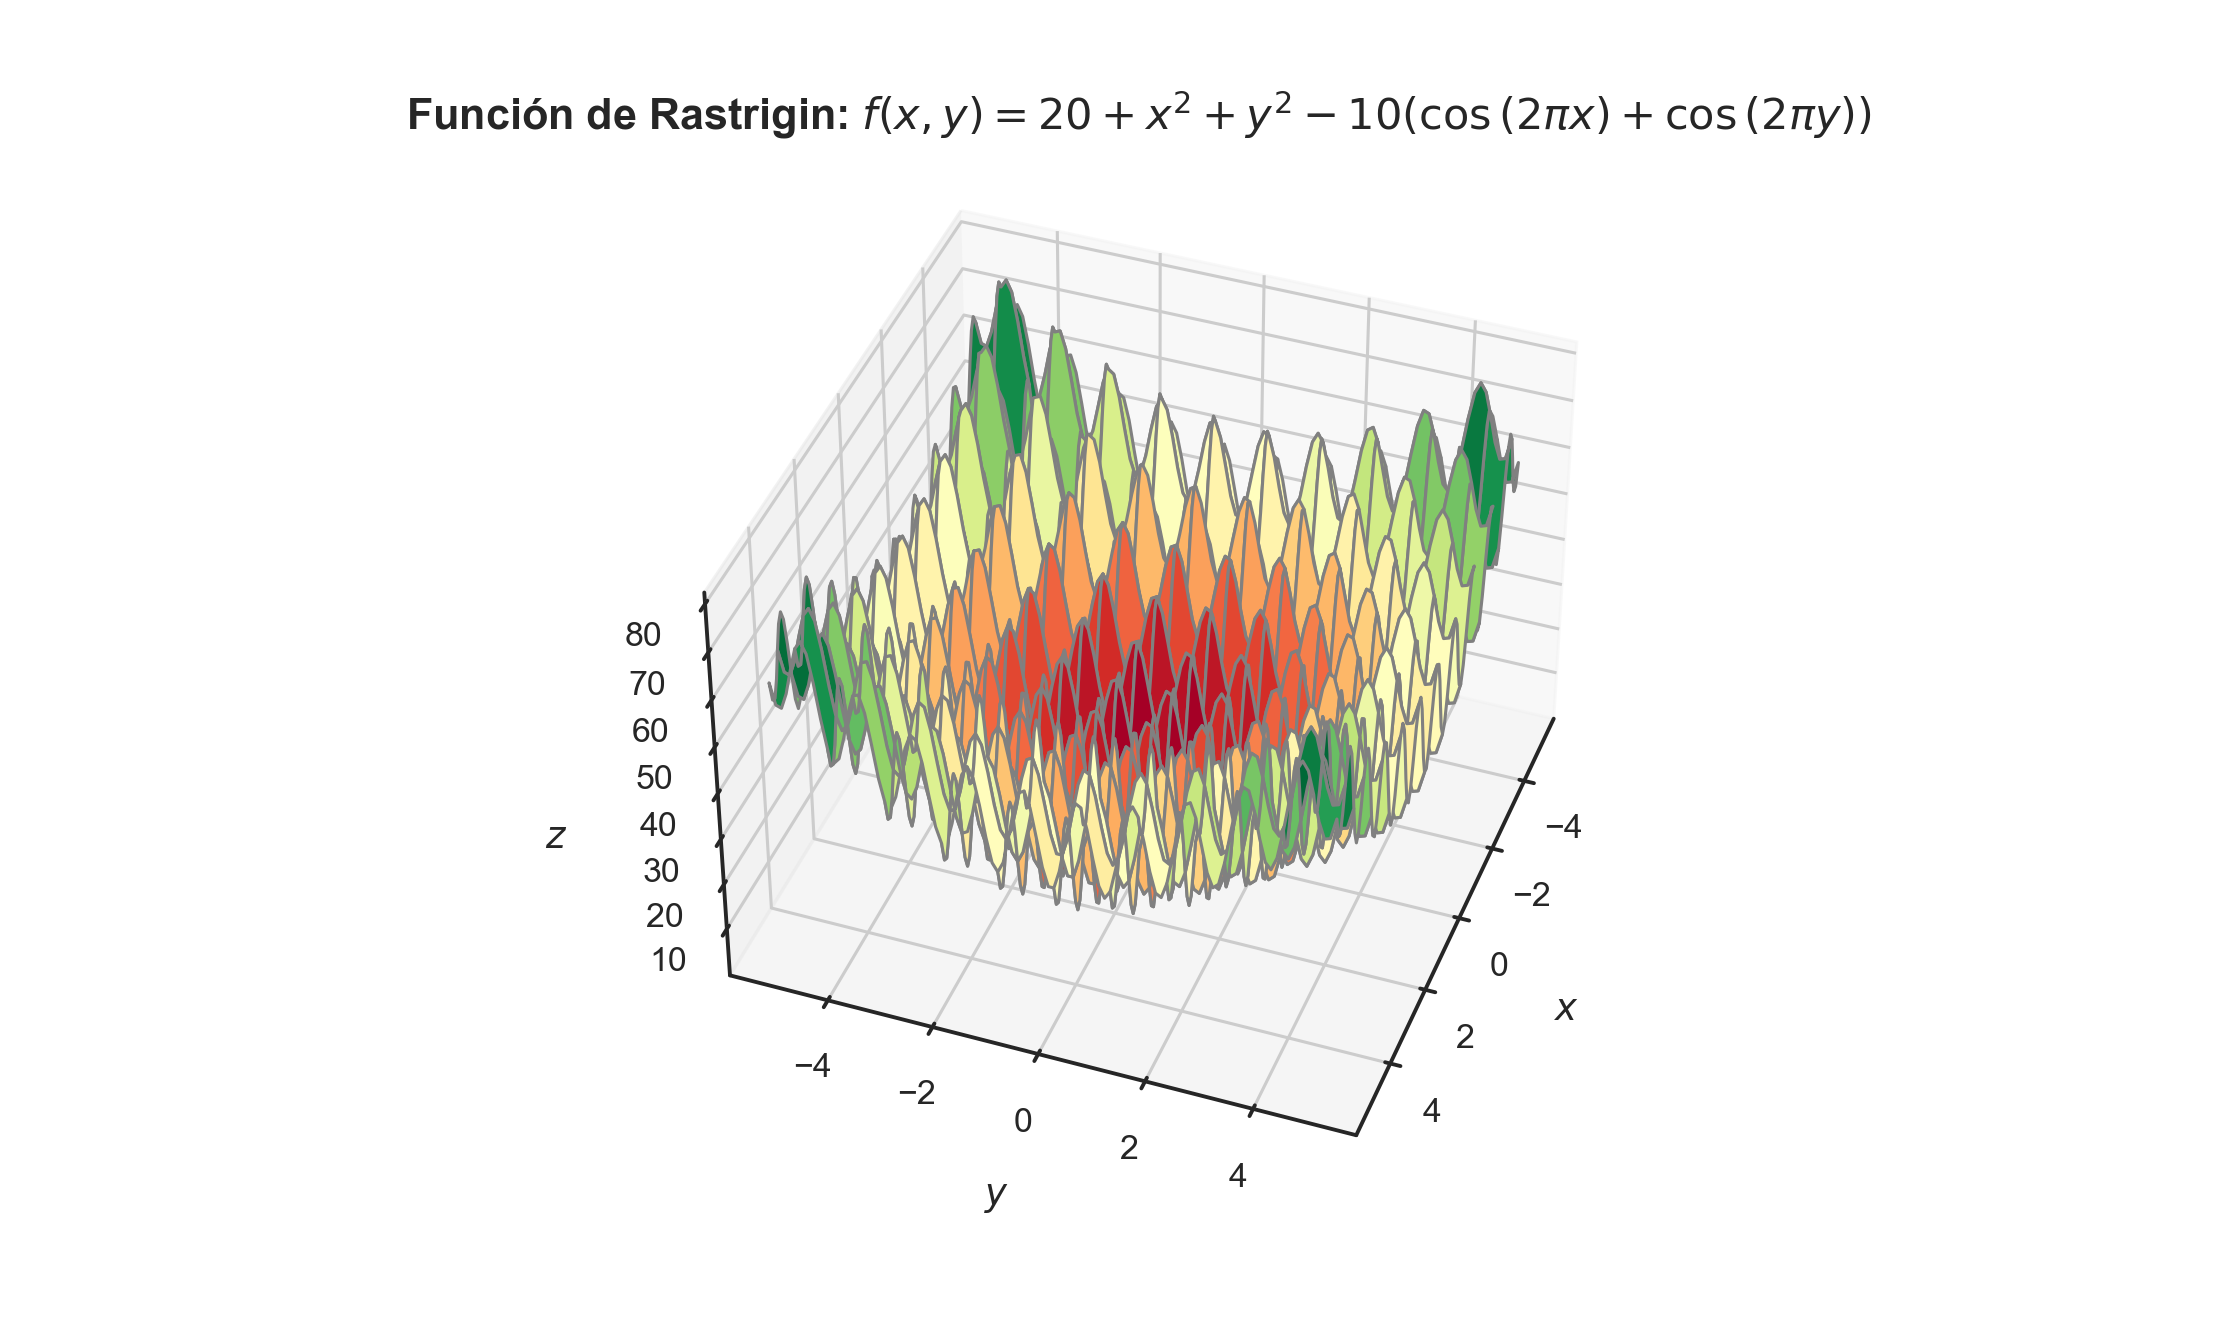

In [33]:
# Graficamos la superficie resultante de esta función.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, edgecolor="gray", cmap='RdYlGn')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title(
    r'Función de Rastrigin: $f\left( x,y\right)  =20+x^{2}+y^{2}-10\left( \cos \left( 2\pi x\right)  +\cos \left( 2\pi y\right)  \right)$', 
    fontsize=14, fontweight="bold", pad=10
)
ax.view_init(40, 20);

<IPython.core.display.Javascript object>


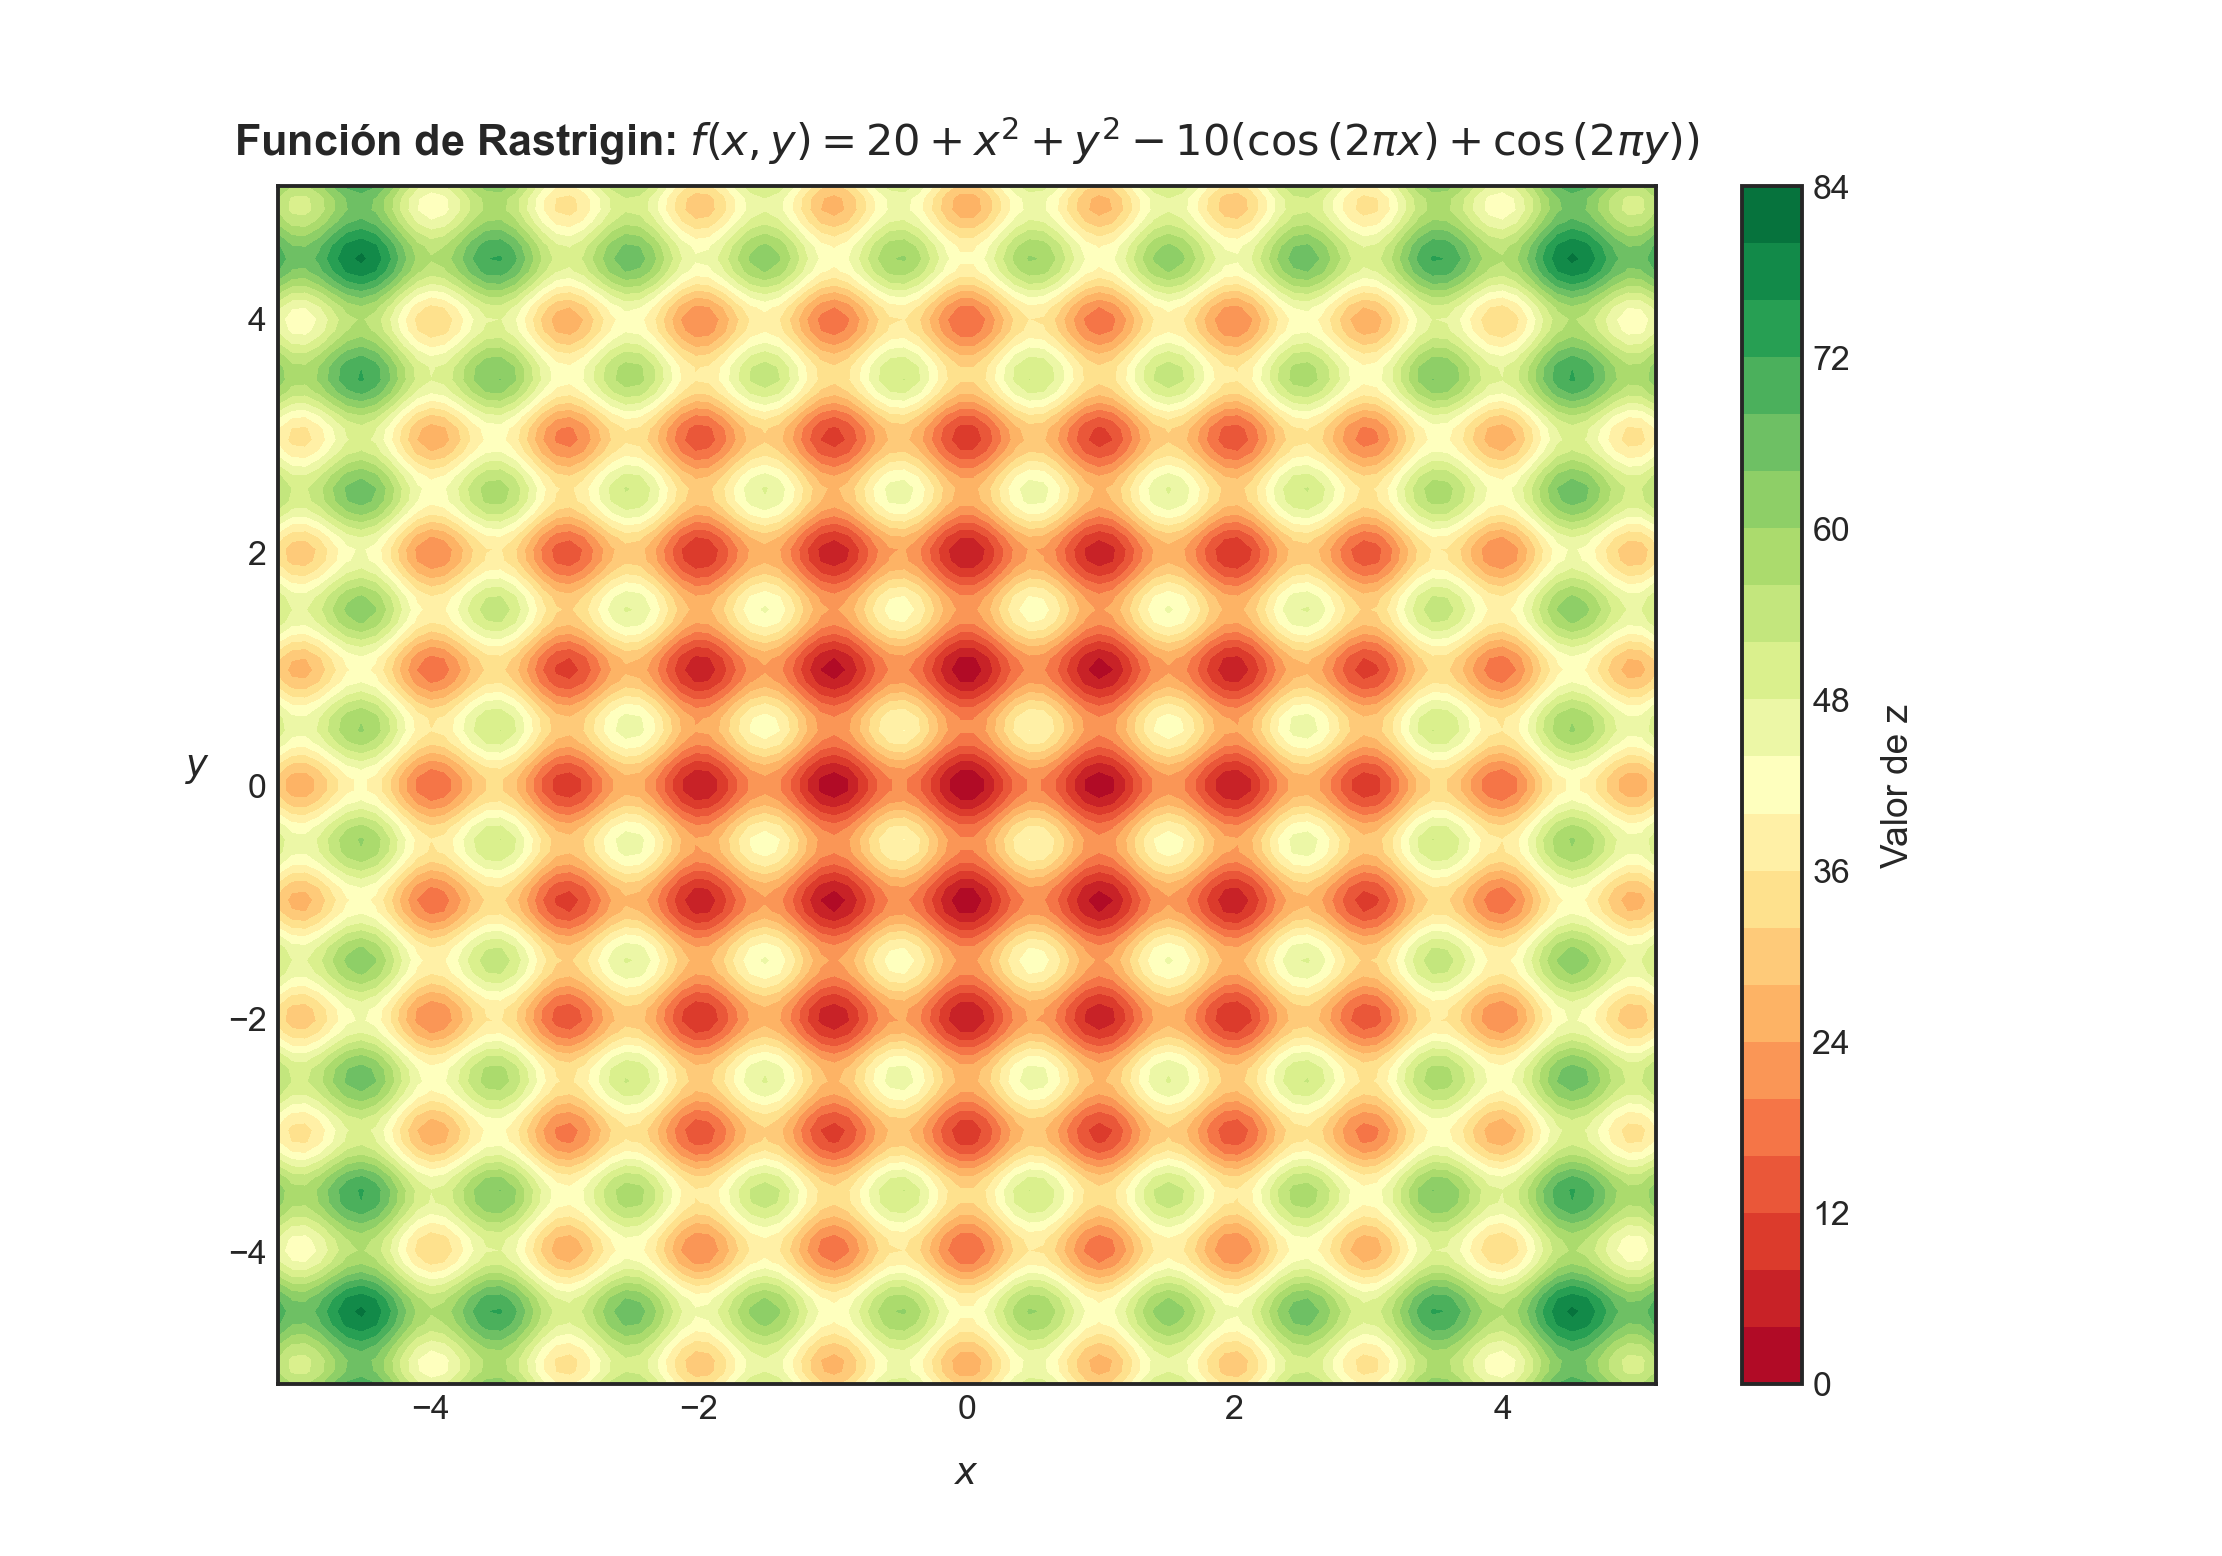

In [34]:
# Y creamos un gráfico de contorno completo para visualizar este mínimo global en 2D.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X, Y, Z, levels=20, cmap='RdYlGn')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10, rotation=0)
ax.set_title(
    r'Función de Rastrigin: $f\left( x,y\right)  =20+x^{2}+y^{2}-10\left( \cos \left( 2\pi x\right)  +\cos \left( 2\pi y\right)  \right)$', 
    fontsize=14, fontweight="bold", pad=10
)
cb = plt.colorbar(p)
cb.set_label("Valor de z", fontsize=12, labelpad=10);

### La función `scipy.optimize.minimize()`.
En el módulo `scipy.optimize`, la función encargada de resolver problemas de optimización corresponde, en términos generales, a `scipy.optimize.minimize()` (en adelante, sólo `minimize()`). De esta manera, cualquier problema de interés que queramos resolver por medio del uso de esta función deberá ser tal que su función objetivo siempre sea de minimización. Esto no representa ningún problema, puesto que, como comentamos antes, para problemas de maximización, siempre podremos realizar la conversión $\max(f)=-\min(f)$, para toda función $f$.

La función `minimize()` trabaja con varios argumentos, muchos de los cuales son opcionales debido a que no siempre será sencillo computar algunos de ellos. Como mínimo, debemos proveer dos parámetros:

- `fun`: La función objetivo a evaluar. En este caso, proveemos la función directamente, ya que este argumento es de tipo `callable`. Por ejemplo, si la función objetivo fuera la función de Rastrigin que definimos previamente, bastará con usar su `callable` como argumento. Es decir, `rastrigin`. La función `fun` siempre debe ser del tipo `fun(x, **args)`, donde `x` es un arreglo de **Numpy** de geometría `(n,)` (`n` es el total de elementos del arreglo), y `**args` corresponde a una tupla de parámetros estáticos que permiten especificar ciertos elementos de la función (y que, por extensión, resultan opcionales).
- `x0`: Corresponde a lo que formalmente se conoce como **solución inicial**. Los algoritmos de **Scipy** realizan una búsqueda sistemática de la solución óptima de un problema en un espacio determinado (llamado **espacio de búsqueda**). El valor `x0` corresponde al punto en el cual se inicia dicha búsqueda. En general, mientras más cercano esté dicho punto a la solución óptima, más sencillo le será al algoritmo alcanzar dicha solución.

Sumado a estos parámetros, hay varios argumentos opcionales que son de interés. El primero corresponde a `method`, y que detalla el tipo de algoritmo de optimización que se implementará para resolver nuestro problema. Existen muchos algoritmos que podemos escoger, y que podemos revisar en la correspondiente [documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html). Algunos algoritmos detallados en el parámetro `method` admiten, además, la imputación de las derivadas parciales de la función objetivo cuando éstas son factibles de calcular, en la forma de la correspondiente matriz Jacobiana (que agrupa todas las derivadas parciales de primer orden de una función) y la matriz Hessiana, usando los parámetros `jac` y `hess`, respectivamente.

Hay otros argumentos que serán de interés cuando agreguemos algo de complejidad a los problemas que deseemos resolver. Por el momento, para problemas no restringidos, ésto debería ser suficiente.

Ejemplifiquemos todo esto. Vamos a implementar la función `minimize()` para determinar el mínimo global de la función de Rosenbrock, definida previamente. Esto es tan sencillo como imputar la función como un `callable` y una solución inicial. Como sabemos el mínimo de la función de Rosenbrock se alcanza en el punto $\mathbf{x^\star}=(1,...,1)\in \mathbb{R}^{n}$, tomaremos como solución inicial el punto $\mathbf{x}_{0}=(2, 2, 2, 2, 2)$ y minimizaremos la función de Rosenbrock para el caso $n=5$:

In [35]:
# Importamos la función que utilizaremos para resolver este problema.
from scipy.optimize import minimize

In [36]:
# Resolvemos el problema usando el algoritmo simplex de Nelder-Mead.
x0 = (2, 2, 2, 2, 2)
result = minimize(fun=rosen, x0=x0, method="Nelder-Mead")

La función `minimize()` entrega siempre sus resultados en un objeto del tipo `scipy.optimize.OptimizeResult`, y que es una especie de diccionario que aglutina toda la información relativa a la solución óptima encontrada por nuestro algoritmo. Por ejemplo, mediante la llave `"x"`, podemos consultar la solución óptima encontrada por el algoritmo. Mediante la llave `"fun"`, podemos consultar el valor mínimo de la función (evaluada en la solución óptima encontrada):

In [37]:
# Solución óptima y valor mínimo determinados por el algoritmo.
print(f"Solución óptima encontrada: {result['x']}")
print(f"Valor mínimo estimado: {result['fun']}")

Solución óptima encontrada: [1.00000047 1.00000079 1.0000027  1.00000292 1.00000473]
Valor mínimo estimado: 8.815615550892453e-10


Es claro que el algoritmo fue exitoso en su cometido, ya que ha encontrado la solución óptima del problema que hemos consultado. El estado del algoritmo podemos consultarlo siempre mediante la llave `"status"`, y que corresponde a un número entero cuya codificación depende del algoritmo utilizado. Siempre podremos traducir este estado a palabras simples usando la llave `"message"`:

In [38]:
# Estado del algoritmo.
print(f"Código de estado: {result['status']}")
print(f"Condición: {result['message']}")

Código de estado: 0
Condición: Optimization terminated successfully.


Finalmente, las llaves `"nit"` y `"nfev"` nos permiten consultar el número de iteraciones realizadas por el algoritmo respectivo y el número de evaluaciones de la función objetivo efectuadas en la búsqueda:

In [39]:
# Número de iteraciones y evaluaciones.
print(f"Número de iteraciones: {result['nit']}")
print(f"Número de evaluaciones: {result['nfev']}")

Número de iteraciones: 423
Número de evaluaciones: 683


Como dijimos peviamente, la cercanía de la solución inicial al mínimo global de la función objetivo influye en la calidad de la solución que el algoritmo es capaz de estimar:

In [40]:
# Probaremos distintas soluciones iniciales.
x01 = (2, 2, 2, 2, 2)
x02 = (6, 6, 6, 6, 6)
x03 = (20, 20, 20, 20, 20)
x04 = (60, 60, 60, 60, 60)

In [41]:
# Verificamos nuestros resultados.
for j, x0j in enumerate([x01, x02, x03, x04]):
    result_j = minimize(fun=rosen, x0=x0j, method="Nelder-Mead")
    print(f"Solución óptima {j}: {result_j['x']}")

Solución óptima 0: [1.00000047 1.00000079 1.0000027  1.00000292 1.00000473]
Solución óptima 1: [0.99999936 0.99999217 0.99998191 0.99996442 0.99993143]
Solución óptima 2: [1.06233645 1.1353297  1.27020696 1.59939078 2.5358918 ]
Solución óptima 3: [  1.37904725   1.90288845   3.62261092  13.12679896 172.31749093]


Notemos que el algoritmo implementado es capaz de aproximar razonablemente la solución óptima de nuestro problema únicamente cuando la solución inicial no es muy lejana al mínimo global de la función objetivo. Cuando es muy lejana, los resultados obtenidos son absolutamente incorrectos.

Lo anterior ocurre porque el algoritmo implementado es extremadamente sensible a la existencia de mínimos locales. Como resultado, es muy común que no sea capaz de hallar un mínimo global cuando la función objetivo es multimodal y, además, es también razonable que diverja. Por ejemplo, sabiendo que el mínimo global de la función de Rastrigin está en el origen, apliquemos el algoritmo simplex de Nelder-Mead a fin de verificar si es posible hallar dicho valor:

In [42]:
# Implementación del algoritmo simplex de Nelder-Mead sobre la función de Rastrigin.
result = minimize(fun=rastrigin, x0=x01, method="Nelder-Mead")

In [43]:
# Mostramos la solución óptima en pantalla.
print(f"Solución óptima: {result['x']}")
print(f"Valor mínimo de la función objetivo: {result['fun']}")

Solución óptima: [1.98989201 1.98990361 1.98989773 1.98997022 1.98993487]
Valor mínimo de la función objetivo: 19.899156857239156


Nuestro algoritmo de optimización ha fallado incluso cuando la solución inicial estaba muy cerca del óptimo.

Lo anterior ocurre porque el algoritmo simplex de Nelder-Mead es extremadamente sensible a la existencia de mínimos locales. Como resultado, es muy común que no sea capaz de hallar un mínimo global cuando la función objetivo es multimodal y, además, es también razonable que diverja. 

Otros algoritmos pueden resultar más útiles en escenarios más desafiantes. Por ejemplo, el algoritmo BFGS (acrónimo de *Broyden-Fletcher-Goldfarb-Shanno*) puede aproximar el mínimo global de la función de Rosenbrock sin muchos problemas, incluso si el procedimiento de búsqueda del óptimo parte muy lejos de él:

In [44]:
# Verificamos nuestros resultados.
for j, x0j in enumerate([x01, x02, x03, x04]):
    result_j = minimize(fun=rosen, x0=x0j, method="BFGS")
    print(f"Solución óptima {j}: {result_j['x']}")

Solución óptima 0: [0.99999919 0.9999984  0.99999681 0.99999363 0.99998725]
Solución óptima 1: [0.9999992  0.99999841 0.99999684 0.99999369 0.99998738]
Solución óptima 2: [0.99999935 0.99999891 0.99999768 0.99999533 0.99999053]
Solución óptima 3: [0.9999992  0.9999984  0.99999683 0.99999367 0.99998732]


Pero es incapaz de determinar el mínimo global de la función de Rastrigin, porque tampoco es un algoritmo efectivo cuando la función objetivo es multimodal:

In [45]:
# Implementación del algoritmo BFGS sobre la función de Rastrigin.
result = minimize(fun=rastrigin, x0=x01, method="BFGS")

In [46]:
# Mostramos la solución óptima en pantalla.
print(f"Solución óptima: {np.around(result['x'], 3)}")
print(f"Valor mínimo de la función objetivo: {result['fun']}")

Solución óptima: [1.99 1.99 1.99 1.99 1.99]
Valor mínimo de la función objetivo: 19.899155952770485


El algoritmo BFGS, no obstante, nos ofrece más opciones que el algoritmo simplex a la hora de resolver un problema, a fin de poder mejorar la calidad de las soluciones determinadas, e incluso mejorar los correspondientes tiempos de ejecución. Por ejemplo, si la función objetivo tiene una descripción explícita, podemos calcular sus derivadas parciales correspondientes y agruparlas en un arreglo que hará las funciones de gradiente de la misma. Recordemos de los cursos de cálculo que, para una función $f:U\subseteq \mathbb{R}^{n} \longrightarrow \mathbb{R}$ definida en un conjunto abierto $U$ de $\mathbb{R}^{n}$, el gradiente de $f$ es un vector compuesto por las derivadas parciales de $f$:

$$\nabla f\left( \mathbf{x} \right)  =\left( \frac{\partial f}{\partial x_{1}} ,\frac{\partial f}{\partial x_{2}} ,\  ...\  ,\frac{\partial f}{\partial x_{n}} \right)$$
</p> <p style="text-align: right;">$(3.18)$</p>

Para el caso de la función de Rosenbrock, sus derivadas parciales pueden calcularse (con algo de esfuerzo) separando la suma que define a dicha función entre sus términos extremos ($i=1$ e $i=n$) y sus términos intermedios ($1<i<n$). De esta manera, para $i=1$, tenemos que

$$\begin{array}{lll}\displaystyle \frac{\partial f}{\partial x_{1}} &=&\displaystyle \frac{\partial }{\partial x_{1}} \left( 100\left( x_{2}-x^{2}_{1}\right)^{2}  +\left( 1-x_{1}\right)^{2}  \right)  \\ &=&-400x_{1}\left( x_{2}-x^{2}_{1}\right)  -2\left( 1-x_{1}\right)  \end{array}$$
</p> <p style="text-align: right;">$(3.19)$</p>

Por otro lado, para $i=n$,

$$\begin{array}{lll}\displaystyle \frac{\partial f}{\partial x_{n}} &=&\displaystyle \frac{\partial }{\partial x_{n}} \left( 100\left( x_{n}-x^{2}_{n-1}\right)^{2}  \right)  \\ &=&200\left( x_{n}-x^{2}_{n-1}\right)  \end{array}$$
</p> <p style="text-align: right;">$(3.20)$</p>

Finalmente, para $1<i<n$,

$$\begin{array}{lll}\displaystyle \frac{\partial f}{\partial x_{i}} &=&\displaystyle \frac{\partial }{\partial x_{i}} \left( 100\left( x_{i+1}-x^{2}_{i}\right)^{2}  +\left( 1-x_{i}\right)^{2}  +100\left( x_{i}-x^{2}_{i-1}\right)^{2}  \right)  \\ &=&-400x_{i}\left( x_{i+1}-x^{2}_{i}\right)  -2\left( 1-x_{i}\right)  +200\left( x_{i}-x^{2}_{i-1}\right)  \end{array}$$
</p> <p style="text-align: right;">$(3.21)$</p>

En resumen, juntando todo en una única expresión, tenemos que

$$\frac{\partial f}{\partial x_{i}} =\begin{cases}-400x_{1}\left( x_{2}-x^{2}_{1}\right)  -2\left( 1-x_{1}\right)  &;\  \mathrm{s} \mathrm{i} \  i=1\\ -400x_{i}\left( x_{i+1}-x^{2}_{i}\right)  -2\left( 1-x_{i}\right)  +200\left( x_{i}-x^{2}_{i-1}\right)  &;\  \mathrm{s} \mathrm{i} \  1<i<n\\ 200\left( x_{n}-x^{2}_{n-1}\right)  &;\  \mathrm{s} \mathrm{i} \  i=n\end{cases}$$
</p> <p style="text-align: right;">$(3.22)$</p>

Y ya tenemos una expresión general para las derivadas parciales de nuestra función objetivo. Por lo tanto, podemos construir una función de Python que permita calcular el gradiente completo de la función de Rosenbrock como sigue:

In [47]:
# Una función que computa el gradiente de la función de Rosenbrock.
def rosen_grad(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    diff = np.zeros_like(x)
    diff[1:-1] = 200*(xm - xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1 - xm)
    diff[0] = -400*x[0]*(x[1] - x[0]**2) - 2*(1 - x[0])
    diff[-1] = 200*(x[-1] - x[-2]**2)
    
    return diff

Y con esto, ya podemos incorporar esta información al algoritmo BFGS al buscar el mínimo global de la función de Rosenbrock:

In [48]:
# Implementación del algoritmo BFGS sobre la función de Rosenbrock, usando el gradiente de
# dicha función.
result = minimize(fun=rosen, x0=x01, method="BFGS", jac=rosen_grad)

In [49]:
# Mostramos la solución óptima en pantalla.
print(f"Solución óptima: {np.around(result['x'], 3)}")
print(f"Valor mínimo de la función objetivo: {result['fun']}")

Solución óptima: [1. 1. 1. 1. 1.]
Valor mínimo de la función objetivo: 2.4374758679761786e-14


La solución óptima ahora es exacta gracias a esta nueva información.

La incorporación de los gradientes en el algoritmo de optimización no sólo permite asegurar, en el caso del algoritmo BFGS, una mejor solución, sino que además, un menor tiempo de ejecución:

In [50]:
%timeit result = minimize(fun=rosen, x0=x01, method="BFGS")
%timeit result = minimize(fun=rosen, x0=x01, method="BFGS", jac=rosen_grad)

20.1 ms ± 351 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.42 ms ± 53 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


En general, los algoritmos de optimización que son sensibles a la existencia de mínimos locales no mejorarán sus estimaciones cuando les incorporamos más información relativa a la función objetivo. El objetivo de la adición de información adicional, como el caso de gradientes (o matrices jacobianas, cuando la función objetivo es un campo vectorial) es llegar al óptimo más rápido, en menos iteraciones o con una menor cantidad de evaluaciones de la función objetivo.

Hay algoritmos que también nos exigen más información para resolver un problema de optimización. Un ejemplo es el algoritmo de gradiente conjugado de Newton (que, en el caso de la función `minimize()`, se expresa como `"Newton-CG"`). Dicho algoritmo plantea un procedimiento iterativo basado en la expresión

$$\mathbf{x}^{\star}=\mathbf{x}_{0}-\mathbf{H}^{-1}(\mathbf{x})\nabla f(\mathbf{x})$$
</p> <p style="text-align: right;">$(3.22)$</p>

Donde $\mathbf{x}_{0}$ es la solución inicial del algoritmo y $\mathbf{H}(\mathbf{x})$ es la matriz Hessiana de $f$ evaluada en el vector $\mathbf{x}$.

La matriz Hessiana es el resultado de un cálculo que muchas veces eleva demasiado la complejidad de un problema de optimización. Para una función del tipo $f:U\subseteq \mathbb{R}^{n} \longrightarrow \mathbb{R}$, definida en un conjunto abierto $U$ de $\mathbb{R}^{n}$, la matriz Hessiana estará compuesta por un total de $n^{2}$ entradas que representarán las derivadas parciales de segundo orden de $f$. Si nuestra función objetivo tiene 10 variables, calcular su matriz Hessiana implicará generar un arreglo con 100 entradas en total. Por lo tanto, podemos incluso pensar en la matriz Hessiana como un lujo que pocas veces nos podremos permitir pagar.

Para el caso de la función de Rosenbrock, podemos seguir un procedimiento similar al del gradiente para calcular las derivadas parciales de segundo orden que componen las entradas de la matriz Hessiana. En este caso, es buena idea derivar los casos para la primera fila, la última fila, y el resto de las filas de esta matriz. Luego, para la primera fila (es decir, para $i=1$):

- Elemento diagonal ($i=j=1$): 

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x^{2}_{1}} &=&\displaystyle \frac{\partial }{\partial x_{1}} \left( -400x_{1}\left( x_{2}-x^{2}_{1}\right)  -2\left( 1-x_{1}\right)  \right)  \\ &=&1200x^{2}_{1}-400x_{2}+2\end{array} $$
</p> <p style="text-align: right;">$(3.23)$</p>

- Elemento no diagonal ($j=2$):

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x_{1}\partial x_{2}} &=&\displaystyle \frac{\partial }{\partial x_{2}} \left( -400x_{1}\left( x_{2}-x^{2}_{1}\right)  \right)  \\ &=&-400x_{1}\end{array}$$
</p> <p style="text-align: right;">$(3.24)$</p>

Para la última fila ($i=n$):

- Elemento diagonal ($j=n$):

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x^{2}_{n}} &=&\displaystyle \frac{\partial }{\partial x_{n}} \left( 200\left( x_{n}-x^{2}_{n-1}\right)  \right)  \\ &=&200\end{array}$$
</p> <p style="text-align: right;">$(3.25)$</p>

- Elemento no diagonal ($j=n-1$):

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x_{n}\partial x_{n-1}} &=&\displaystyle \frac{\partial }{\partial x_{n-1}} \left( 200\left( x_{n}-x^{2}_{n-1}\right)  \right)  \\ &=&-400x_{n-1}\end{array}$$
</p> <p style="text-align: right;">$(3.26)$</p>

Para el resto de las filas ($1<j<n$):

- Elemento diagonal ($i=j$):

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x^{2}_{i}} &=&\displaystyle \frac{\partial }{\partial x_{i}} \left( -400x_{i}\left( x_{i+1}-x^{2}_{i}\right)  -2\left( 1-x_{i}\right)  +200\left( x_{i}-x^{2}_{i-1}\right)  \right)  \\ &=&1200x^{2}_{i}-400x_{i+1}+202\end{array}$$
</p> <p style="text-align: right;">$(3.27)$</p>

- Elemento no diagonal ($j=i-1$):

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x_{i}x_{i-1}} &=&\displaystyle \frac{\partial }{\partial x_{i-1}} \left( 200\left( x_{i}-x^{2}_{i-1}\right)  \right)  \\ &=&-400x_{i-1}\end{array}$$
</p> <p style="text-align: right;">$(3.28)$</p>

- Elemento no diagonal ($j=i+1$):

$$\begin{array}{lll}\displaystyle \frac{\partial^{2} f}{\partial x_{i}x_{i+1}} &=&\displaystyle \frac{\partial }{\partial x_{i+1}} \left( -400x_{i}\left( x_{i+1}-x^{2}_{i}\right)  \right)  \\ &=&-400x_{i}\end{array}$$
</p> <p style="text-align: right;">$(3.29)$</p>

Juntando todo, podemos escribir finalmente la matriz Hessiana de la función de Rosenbrock como sigue:

$$\mathbf{H} \left( \mathbf{x} \right)  =\left( \begin{array}{ccccc}1200x^{2}_{1}-400x_{2}+2&-400x_{1}&0&\cdots &0\\ -400x_{1}&1200x^{2}_{2}-400x_{3}+202&-400x_{2}&\cdots &0\\ 0&-400x_{2}&1200x^{2}_{3}-400x_{4}+202&\cdots &0\\ \vdots &\vdots &\vdots &\ddots &\vdots \\ 0&0&0&\cdots &200\end{array} \right)$$
</p> <p style="text-align: right;">$(3.30)$</p>

Con esta información, ya podemos definir esta matriz Hessiana por medio de una función de Python:

In [51]:
# Definimos la matriz Hessiana de la función de Rosenbrock.
def rosen_hessian(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1], 1) - np.diag(400*x[:-1], -1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200 * x[0] ** 2 - 400 * x[1] + 2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200 * x[1:-1] ** 2 - 400 * x[2:]
    H = H + np.diag(diagonal)
    return H

Y podemos incorporarla a algoritmo conjugado de Newton para resolver el problema de determinar el mínimo global de la función de Rosenbrock. En esta oportunidad, añadiremos una impresión en pantalla de los resultados completos de la optimización por medio del argumento `options`, el cual corresponde a un diccionario que permite incorporar varias opciones adicionales que pueden resultar de interés en la resolución de nuestro problema. Una de ellas es la impresión en pantalla de los resultados de la optimización, vía el parámetro Booleano `disp`:

In [52]:
# Implementación del algoritmo conjugado de Newton sobre la función de Rosenbrock, usando el gradiente y
# la matriz Hessiana de dicha función.
result = minimize(
    fun=rosen, x0=x01, method="Newton-CG", jac=rosen_grad, 
    hess=rosen_hessian, options={'disp': True}
)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 45
         Gradient evaluations: 45
         Hessian evaluations: 31


In [53]:
# Mostramos la solución óptima en pantalla.
print(f"Solución óptima: {np.around(result['x'], 3)}")
print(f"Valor mínimo de la función objetivo: {result['fun']}")

Solución óptima: [1. 1. 1. 1. 1.]
Valor mínimo de la función objetivo: 6.320424295238026e-10


La incorporación de la matriz Hessiana permite ahorrar tiempo en la ejecución de un algoritmo de optimización, aunque no demasiado:

In [54]:
%timeit result = minimize(fun=rosen, x0=x01, method="Newton-CG", jac=rosen_grad)
%timeit result = minimize(fun=rosen, x0=x01, method="Newton-CG", jac=rosen_grad, hess=rosen_hessian)

16.8 ms ± 2.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
10.3 ms ± 95.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


En general, los algoritmos de optimización implementados por defecto en la función `minimize()` no son capaces de garantizar la convergencia de tales procedimientos al mínimo global de la función objetivo. Por esta razón, para problemas no restringidos, los algoritmos simplex de Nelder-Mead, BFGS y de gradiente conjugado de Newton suelen constituir líneas base respecto de las cuales generamos contrastes en relación a algoritmos mucho más potentes, muchos de las cuales tienen su propia implementación en `scipy.optimize`. Ya nos ocuparemos de algunas implementaciones un poco más adelante. Por el momento, finalizaremos esta primera implementación de la función `minimize()` comentando que un algoritmo útil para la resolución de problemas de optimización con funciones objetivo multimodales es el método secuencial de programación vía mínimos cuadrados (*sequental least squares programming*, o SLSQP) y que es capaz de determinar el mínimo global de la función de Rastrigin en un espacio de búsqueda amplio. Recordemos que la función de Rastrigin tiene su mínimo global en el origen, y es igual a cero:

In [55]:
# Probaremos distintas soluciones iniciales.
x01 = (2, 2, 2, 2, 2)
x02 = (6, 6, 6, 6, 6)
x03 = (20, 20, 20, 20, 20)
x04 = (60, 60, 60, 60, 60)

In [56]:
# Determinamos el mínimo global de la función de Rastrigin mediante el algoritmo SLSQP para todas
# las soluciones iniciales anteriores.
for j, x0j in enumerate([x01, x02, x03, x04]):
    result_j = minimize(fun=rastrigin, x0=x0j, method="SLSQP")
    print(f"Solución óptima {j}: {np.around(result_j['x'], 3)}")

Solución óptima 0: [0. 0. 0. 0. 0.]
Solución óptima 1: [0. 0. 0. 0. 0.]
Solución óptima 2: [0. 0. 0. 0. 0.]
Solución óptima 3: [0. 0. 0. 0. 0.]


En general, el algoritmo SLSQP es una buena opción cuando deseamos resolver un problema de optimización no restringido rápidamente y no contamos con las derivadas de la función objetivo, ya sea porque éstas son muy costosas de computar, o bien, porque no podemos hacerlo.

Por supuesto, las opciones a nuestra disposición pueden cambiar enormemente si el problema a resolver presenta restricciones. Esto es lo que abordaremos a continuación.

### Problemas restringidos.
Como cabría esperar, el asunto cambia completamente cuando queremos resolver problemas de optimización que cuentan con un número arbitrario de restricciones. En un caso así, dependiendo del algoritmo escogido, tendremos que definir ciertos objetos que jugarán el papel de dichas restricciones.

Para este caso, vamos a intentar resolver el siguiente problema, donde la función objetivo es la función de Rosenbrock en dos dimensiones:

$$\begin{array}{ll}\displaystyle \min_{\left( x_{1},x_{2}\right)  } &100\left( x_{2}-x^{2}_{1}\right)^{2}  +\left( 1-x_{1}\right)^{2}  \\ \mathrm{s} .\mathrm{a} .:&x_{1}+2x_{2}\leq 1\\ &x^{2}_{1}+x_{2}\leq 1\\ &x^{2}_{1}-x_{2}\leq 1\\ &2x_{1}+x_{2}=1\\ &0\leq x_{1}\leq 1\\ &-\frac{1}{2} \leq x_{2}\leq 2\end{array}$$
</p> <p style="text-align: right;">$(3.31)$</p>

A fin de entender el efecto de todas las restricciones, construiremos un gráfico que permite identificar el espacio de soluciones factibles del problema (3.31):

In [57]:
# Generamos una grilla donde evaluaremos la función objetivo y sus restricciones.
x1 = np.linspace(start=-3, stop=3, num=100)
x2 = np.linspace(start=-3, stop=3, num=100)
X1, X2 = np.meshgrid(x1, x2)

In [58]:
# Definimos mediante funciones simples las restricciones de desigualdad.
F1 = X1 + 2 * X2 - 1
F2 = X1**2 + X2 - 1
F3 = X1**2 - X2 - 1

In [59]:
# Evaluamos la función objetivo sobre la grilla.
Z = 100*(X2 - X1**2)**2 + (1 - X1)**2

<IPython.core.display.Javascript object>


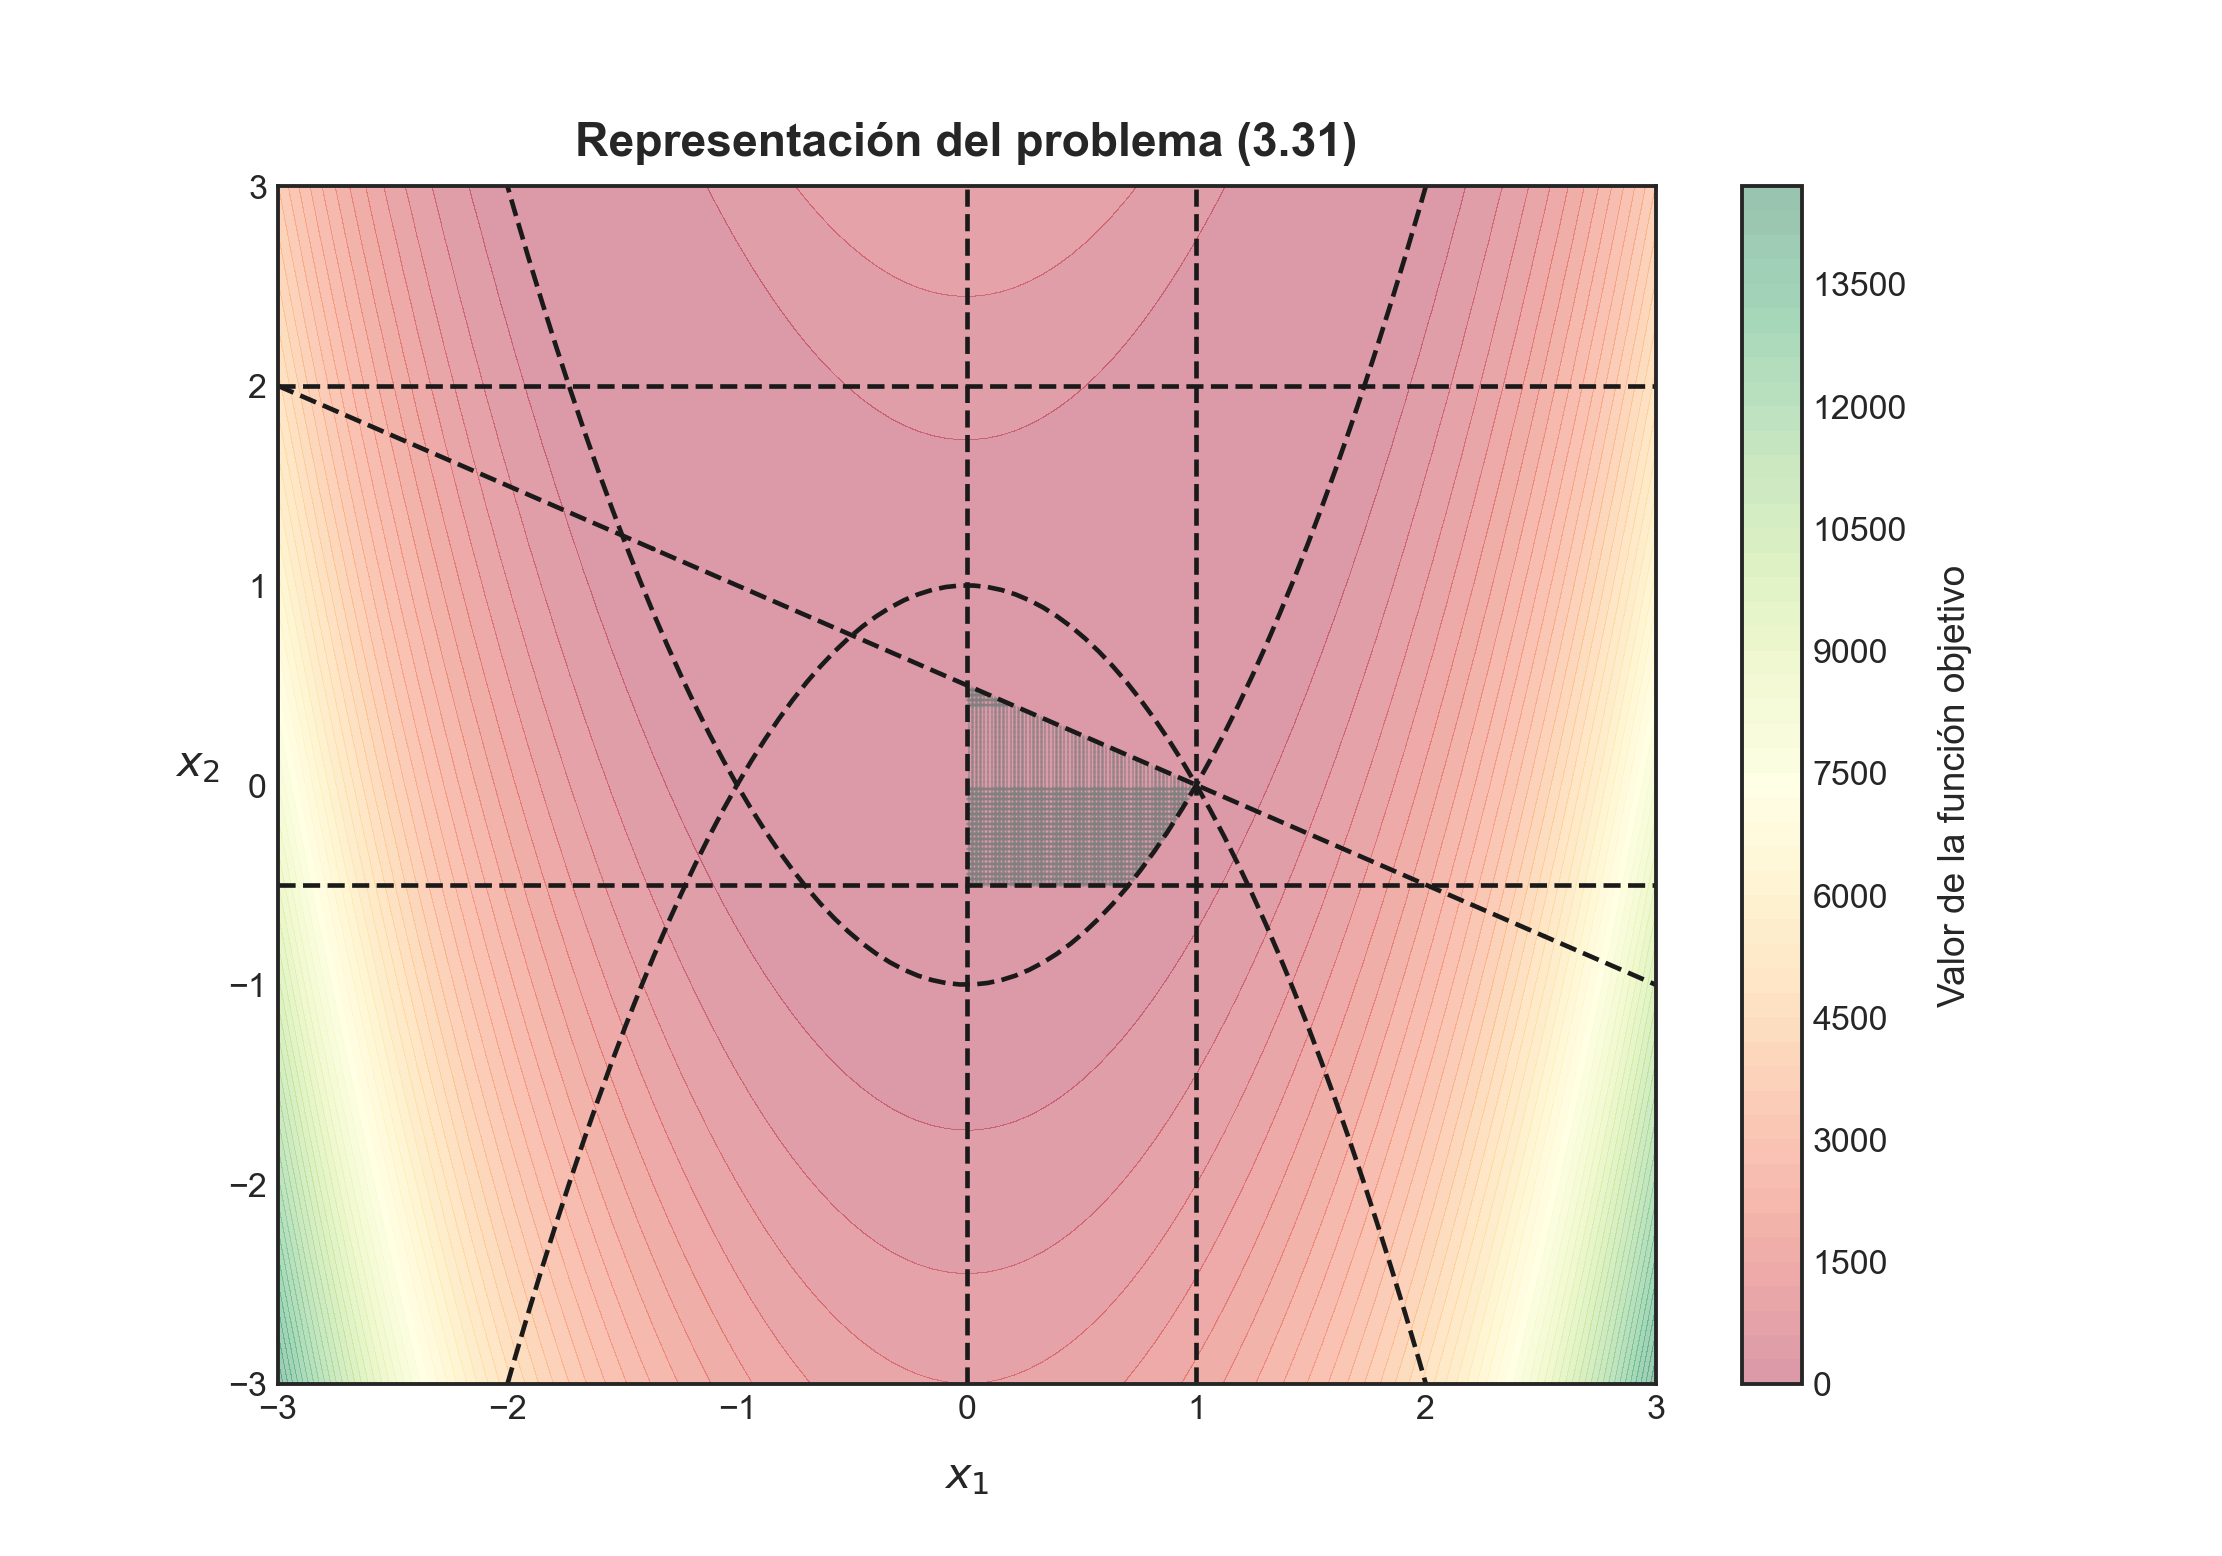

In [60]:
# Construimos los contornos que representan a las restricciones.
# Advertencia: Este bloque de código tarda un poco en ejecutarse.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(X1, X2, Z, levels=50, cmap="RdYlGn", alpha=0.4)
ax.contour(X1, X2, F1, levels=[0], colors='k', linestyles='dashed')
ax.contour(X1, X2, F2, levels=[0], colors='k', linestyles='dashed')
ax.contour(X1, X2, F3, levels=[0], colors='k', linestyles='dashed')
ax.axhline(y=2, color='k', linestyle='dashed')
ax.axhline(y=-0.5, color='k', linestyle='dashed')
ax.axvline(x=0, color='k', linestyle='dashed')
ax.axvline(x=1, color='k', linestyle='dashed')
cb = plt.colorbar(p)
cb.set_label("Valor de la función objetivo", fontsize=12, labelpad=10)

# Creamos una máscara para contener la región que representan las desigualdades.
mask = (F1 <= 0) & (F2 <= 0) & (F3 <= 0)

# Llenamos la región de color gris.
x1_fill = np.linspace(0, 1, 400)
x2_fill = np.linspace(-0.5, 2, 400)

for x1_val in x1_fill:
    for x2_val in x2_fill:
        if (x1_val + 2 * x2_val <= 1) and (x1_val**2 + x2_val <= 1) and (x1_val**2 - x2_val <= 1):
            ax.fill_between([x1_val, x1_val + 1e-3], x2_val, x2_val + 1e-3, color='gray', alpha=0.5)

# Etiquetamos los ejes del gráfico.
ax.set_xlabel("$x_1$", fontsize=14, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=14, labelpad=10, rotation=0)
ax.set_title("Representación del problema (3.31)", fontsize=15, fontweight="bold", pad=10);

El gráfico anterior da cuenta de que varias de las restricciones planteadas en el problema son redundantes. Sólo aquellas que limitan el espacio de soluciones factibles serán aquellas que cualquier algoritmo utilizará como base para la búsqueda de una solución óptima. El resto pueden ser ignoradas (y, en la práctica, se denominan restricciones redundantes).

La solución óptima de este problema es $(x_{1}, x_{2})=(0.4149, 0.1701)$.

Para la resolución de un problema restringido mediante la función `minimize()`, es bueno separar los casos en función de la información de la que dispongamos. En algunos casos (como el del presente ejemplo), podremos computar varios elementos matriciales requeridos por algunos algoritmos de optimización. En otros casos, no será tan sencillo. Por esa razón, es buena idea fragmentar nuestro problema y reconocer los tipos de restricciones asociadas a él.

**(a) Condiciones de frontera:** Las condiciones de frontera permiten limitar el espacio de soluciones factibles de un problema de optimización mediante el uso de constantes y son del tipo $a_{i}\leq x_{i}\leq b_{i}$. En el problema (3.31) hay dos de estas restricciones: $0\leq x_{1}\leq 1$ y $-\frac{1}{2}\leq x_{2}\leq 2$. En `scipy.optimize`, tales restricciones se pueden expresar mediante el uso de la clase `Bounds`, imputando en un formato de listas las cotas inferiores de cada una, y luego las cotas superiores:

In [61]:
# Importamos la clase Bounds.
from scipy.optimize import Bounds

In [62]:
# Definimos las condiciones de frontera.
bounds = Bounds([0.0, -0.5], [1.0, 2.0])

**(b) Restricciones lineales:** Las restricciones lineales pueden escribirse conforme una notación matricial, de manera similar a como escribimos matricialmente un sistema de ecuaciones lineales. De esta manera, para el caso del problema (3.31), las dos restricciones lineales existentes pueden escribirse como sigue:

$$\begin{array}{rll}x_{1}+2x_{2}&\leq &1\\ 2x_{1}+x_{2}&=&1\end{array} \  \Longrightarrow \  \left( \begin{array}{c}-\infty \\ 1\end{array} \right)  \leq \left( \begin{array}{cc}1&2\\ 2&1\end{array} \right)  \left( \begin{array}{c}x_{1}\\ x_{2}\end{array} \right)  \leq \left( \begin{array}{c}1\\ 1\end{array} \right)$$
</p> <p style="text-align: right;">$(3.32)$</p>

Dada la expresión matricial anterior, es posible imputar las restricciones lineales de un problema de optimización mediante el uso de la clase `LinearConstraint`:

In [63]:
# Importamos el objeto LinearConstraint.
from scipy.optimize import LinearConstraint

In [64]:
# Definimos las restricciones lineales del problema.
linear_constraint = LinearConstraint([[1, 2], [2, 1]], [-np.inf, 1], [1, 1])

Notemos que el orden de imputación de las restricciones, considerando la notación matricial (3.32), es: Matriz de coeficientes de las restricciones, cotas inferiores, cotas superiores.

**(c) Restricciones no lineales:** Para el caso de restricciones no lineales, cuando éstas son de tipo polinómicas, también es posible reescribirlas matricialmente, de la misma forma que lo haríamos para un sistema no lineal de ecuaciones. De esta manera, para el caso del problema (3.31), las dos restricciones no lineales existentes pueden escribirse como:

$$c(x_{1}, x_{2})  =\left( \begin{array}{c}x^{2}_{1}+x_{2}\\ x^{2}_{1}-x_{2}\end{array} \right)  \leq \left( \begin{array}{c}1\\ 1\end{array} \right)$$
</p> <p style="text-align: right;">$(3.33)$</p>

Cuya matriz jacobiana $\mathbf{J}(x_{1},x_{2})$ es

$$\mathbf{J} \left( x_{1},x_{2}\right)  =\left( \begin{array}{cc}\displaystyle \frac{\partial c_{1}\left( x_{1},x_{2}\right)  }{\partial x_{1}} &\displaystyle \frac{\partial c_{1}\left( x_{1},x_{2}\right)  }{\partial x_{2}} \\ \displaystyle \frac{\partial c_{2}\left( x_{1},x_{2}\right)  }{\partial x_{1}} &\displaystyle \frac{\partial c_{2}\left( x_{1},x_{2}\right)  }{\partial x_{2}} \end{array} \right)  =\left( \begin{array}{cc}2x_{1}&1\\ 2x_{1}&-1\end{array} \right)$$
</p> <p style="text-align: right;">$(3.34)$</p>

Por otro lado, la matriz Hessiana de $c(x_{1},x_{2})$ puede generarse a partir de la siguiente combinación lineal:

$$\mathbf{H} \left( \mathbf{v} ,\mathbf{x} \right)  =v_{1}\underbrace{\nabla^{2} c_{1}\left( x_{1},x_{2}\right)  }_{\frac{\partial^{2} c_{1}\left( x_{1},x_{2}\right)  }{\partial x^{2}_{1}} +\frac{\partial^{2} c_{1}\left( x_{1},x_{2}\right)  }{\partial x^{2}_{2}} } +v_{2}\underbrace{\nabla^{2} c_{2}\left( x_{1},x_{2}\right)  }_{\frac{\partial^{2} c_{2}\left( x_{1},x_{2}\right)  }{\partial x^{2}_{1}} +\frac{\partial^{2} c_{2}\left( x_{1},x_{2}\right)  }{\partial x^{2}_{2}} } =v_{1}\left( \begin{array}{cc}2&0\\ 0&0\end{array} \right)  +v_{2}\left( \begin{array}{cc}2&0\\ 0&0\end{array} \right)$$
</p> <p style="text-align: right;">$(3.35)$</p>

Dados los cálculos anteriores, podemos imputar las restricciones no lineales del problema por medio del objeto `NonlinearConstraint` de `scipy.optimize`, definiendo previamente las funciones anteriores en Python: 

In [65]:
# Definimos explícitamente las restricciones no lineales, por medio de su ecuación matricial,
# su matriz Jacobiana y su matriz Hessiana.
def cons_f(x):
    return [x[0]**2 + x[1], x[0]**2 - x[1]]

def cons_J(x):
    return [[2*x[0], 1], [2*x[0], -1]]

def cons_H(x, v):
    return v[0]*np.array([[2, 0], [0, 0]]) + v[1]*np.array([[2, 0], [0, 0]])

In [66]:
# Importamos el objeto NonlinearConstraint.
from scipy.optimize import NonlinearConstraint

In [67]:
# Y definimos nuestra restricción no lineal.
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=cons_H)

Y ya estamos en condiciones de resolver el problema (3.31) por medio de la función `minimize()`. Optaremos en este caso por un algoritmo de resolución conocido como **optimización basada en regiones de confianza** (en inglés, *trust-region optimization*), y que suele emplearse para la resolución de problemas no lineales generales definiendo primeramente un entorno alrededor del mínimo global de la función objetivo, llamado *región de confianza*, en cada iteración:

In [68]:
# Definimos la solución de inicio.
x0 = np.array([0, 0.5])

In [69]:
# Resolvemos el problema.
result = minimize(
    fun=rosen, x0=x0, method="trust-constr",
    jac=rosen_grad, hess=rosen_hessian,
    constraints=[linear_constraint, nonlinear_constraint],
    options={"verbose": 1}, bounds=bounds
)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.044 s.


In [70]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0.4149 0.1701]
Valor mínimo de la función objetivo: 0.3427


Y ahí lo tenemos. Hemos resuelto nuestro problema.

Las definiciones anteriores de las restricciones fueron indudablemente un tanto engorrosas, pero necesarias para describir el problema de optimización a cabalidad. Sin embargo, es posible ahorrarnos algo de trabajo si nos vemos enfrentados a un problema cuyas restricciones no lineales tengan una matriz Hessiana muy costosa (en términos computacionales) de evaluar. Para ello, podemos hacer uso de estrategias de aproximación de esta matriz que están disponibles en `scipy.optimize`. Un ejemplo es la estrategia BFGS (sí, de los mismos autores del algoritmo BFGS):

In [71]:
# Importamos el objeto BFGS para actualizar la matriz Hessiana.
from scipy.optimize import BFGS

In [72]:
# Redefinimos nuestras restricciones no lineales.
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=BFGS())

In [73]:
# Resolvemos el problema.
result = minimize(
    fun=rosen, x0=x0, method="trust-constr",
    jac=rosen_grad, hess=rosen_hessian,
    constraints=[linear_constraint, nonlinear_constraint],
    options={"verbose": 1}, bounds=bounds
)

`gtol` termination condition is satisfied.
Number of iterations: 13, function evaluations: 9, CG iterations: 8, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.063 s.


In [74]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0.4149 0.1701]
Valor mínimo de la función objetivo: 0.3427


Otra estrategia corresponde a la actualización de la matriz Hessiana por medio de diferencias finitas en 2D, lo que es posible directamente sobre el objeto `NonlinearConstraint`:

In [75]:
# Redefinimos nuestras restricciones no lineales.
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess="2-point")

In [76]:
# Resolvemos el problema.
result = minimize(
    fun=rosen, x0=x0, method="trust-constr",
    jac=rosen_grad, hess=rosen_hessian,
    constraints=[linear_constraint, nonlinear_constraint],
    options={"verbose": 1}, bounds=bounds
)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.048 s.


In [77]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0.4149 0.1701]
Valor mínimo de la función objetivo: 0.3427


En ambos casos, hemos resuelto el problema (3.13).

La matriz Jacobiana asociada a las restricciones no lineales también puede aproximarse por medio de diferencias finitas 2D. Sin embargo, si lo hacemos, ya no podremos aproximar la matriz Hessiana mediante dicho medio y tendremos que recurrir al uso del objeto `BFGS` usado en primera instancia:

In [78]:
# Redefinimos nuestras restricciones no lineales.
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac="2-point", hess=BFGS())

In [79]:
# Resolvemos el problema.
result = minimize(
    fun=rosen, x0=x0, method="trust-constr",
    jac=rosen_grad, hess=rosen_hessian,
    constraints=[linear_constraint, nonlinear_constraint],
    options={"verbose": 1}, bounds=bounds
)

`gtol` termination condition is satisfied.
Number of iterations: 13, function evaluations: 9, CG iterations: 8, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.05 s.


In [80]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0.4149 0.1701]
Valor mínimo de la función objetivo: 0.3427


Y con esto, también hemos resuelto el problema (3.13).

Alternativamente, también es posible aproximar las derivadas de la función objetivo (representadas por su gradiente y matriz Hessiana, respectivamente) mediante estrategias similares. Por ejemplo, podemos usar diferencias finitas para aproximar el gradiente, y una estrategia de actualización de tipo SR1 (aproximación matricial simétrica de rango 1) para la matriz Hessiana:

In [81]:
# Importamos la estrategia SR1.
from scipy.optimize import SR1

In [82]:
# Resolvemos el problema mediante aproximaciones del gradiente y la matriz Hessiana de la
# función objetivo.
result = minimize(
    fun=rosen, x0=x0, method="trust-constr",
    jac="2-point", hess=SR1(),
    constraints=[linear_constraint, nonlinear_constraint],
    options={"verbose": 1}, bounds=bounds
)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 24, CG iterations: 7, optimality: 4.24e-09, constraint violation: 0.00e+00, execution time: 0.036 s.


In [83]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0.4149 0.1701]
Valor mínimo de la función objetivo: 0.3427


Y con esto también hemos resuelto el problema (3.13).

Si nos resulta un tanto complicado definir las restricciones como lo hicimos previamente, hay otros algoritmos que permiten estandarizar más fácilmente tales definiciones. Un ejemplo es el algoritmo SLSQP, que nos exige definir las restricciones de igualdad y desigualdad del problema por medio de diccionarios cuyas llaves son: `"type"`, que corresponde al tipo de restricción (`"eq"` para las restricciones de igualdad, e `"ineq"` para las restricciones de desigualdad); `"fun"`, que corresponde a un arreglo que define las ecuaciones que representan cada restricción (fila a fila); y `"jac"`, que corresponde a la matriz Jacobiana asociada a las restricciones:

In [84]:
# Restricciones de desigualdad.
ineq_cons = {
    'type': 'ineq',
    'fun' : lambda x: np.array(
        [
            1 - x[0] - 2*x[1],
            1 - x[0]**2 - x[1],
            1 - x[0]**2 + x[1]
        ]
    ),
    'jac' : lambda x: np.array(
        [
            [-1.0, -2.0],
            [-2*x[0], -1.0],
            [-2*x[0], 1.0]
        ]
    )
}

In [85]:
# Restricciones de igualdad.
eq_cons = {
    'type': 'eq',
    'fun' : lambda x: np.array([2*x[0] + x[1] - 1]),
    'jac' : lambda x: np.array([2.0, 1.0])
}

Y ya podemos resolver nuestro problema:

In [86]:
# Resolvemos el problema.
result = minimize(
    fun=rosen, x0=x0, method="SLSQP",
    jac="2-point", constraints=[eq_cons, ineq_cons],
    options={"disp": True}, bounds=bounds
)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.34271757487328197
            Iterations: 5
            Function evaluations: 19
            Gradient evaluations: 5


In [87]:
# Mostramos la solución óptima del problema.
print(f"Solución óptima: {np.around(result['x'], 4)}")
print(f"Valor mínimo de la función objetivo: {np.around(result['fun'], 4)}")

Solución óptima: [0.4149 0.1701]
Valor mínimo de la función objetivo: 0.3427


Y ahí lo tenemos. Problema resuelto, con mucho menos trabajo.